## Retrotransposon analysis in cluster 7
2021-11-25: Based on discussion with Yoshiaki, we have the following questions:
- What percentage of Retrotransposons are differentially expressed in cluster 7?
    - Difference between GBM vs NSC groups?
- What percentage of LINEs vs Alu retrotransposons are upregulated in cluster 7?
    - Difference between GBM vs NSC groups?
- What other retrotransposons are highly expressed that are not Alus (SINEs) or L1s (LINEs)?

In [2]:
#load libraries and scripts
.libPaths(c("/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu","/tmp/RtmpJsRC8Z/renv-system-library", .libPaths()))
.libPaths()

resultsPath <- "~/scratch/gete-gbm/results"
getwd()

library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(genefilter)
library(tidyverse)
library(RCurl)
library(scales)
# library(SingleCellExperiment)
library(AnnotationHub)
library(ensembldb)
# Packages for figure layout formatting
library(grid)
library(gridExtra)

source("~/scratch/gete-gbm/bin/util.R")
source("~/scratch/gete-gbm/bin/util_go.R")
source("~/scratch/gete-gbm/bin/util_seurat.R")
source("~/scratch/gete-gbm/bin/util_viz.R")

[1] "/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu"                       
[2] "/home/samkyy/R/x86_64-pc-linux-gnu-library/4.0"                                        
[3] "/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/r/4.0.2/lib64/R/library"

[1] "/scratch/samkyy/gete-gbm/results"

Attaching SeuratObject

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ readr::spec()   masks genefilter::spec()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘packag

## % of Retrotransposons highly expressed in cluster 7
2021-11-25

In [44]:
## load dataset
gbmsc.gte <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [45]:
## load list of TE genes
te_genes <- read.table("~/scratch/gete-gbm/data/geneName_TE_v23-1gtf.txt", 
               sep=",", header = TRUE,
               col.names=c("gene_id", "TE_class", "TE_family"), 
               fill=FALSE, 
               strip.white=TRUE)

te_genes$gene_id <- sub("_", "-", te_genes$gene_id) # in seurat object, `_` were replaced with `-`.
rownames(te_genes) <- te_genes$gene_id

dim(te_genes)
head(te_genes,10)

[1] 1180    3

,gene_id,TE_class,TE_family
,<chr>,<chr>,<chr>
TAR1,TAR1,Satellite,telo
L1MC5a,L1MC5a,LINE,L1
MER5B,MER5B,DNA,hAT-Charlie
MIR3,MIR3,SINE,MIR
L2a,L2a,LINE,L2
L3,L3,LINE,CR1
Plat-L3,Plat-L3,LINE,CR1
MLT1K,MLT1K,LTR,ERVL-MaLR
MIR,MIR,SINE,MIR


In [46]:
## Total number of retrotransposons detected in our transcriptome experiment. 

matched <- match(unique(te_genes$gene_id), rownames(gbmsc.gte@assays$RNA@data))
matched <- intersect(unique(te_genes$gene_id), rownames(gbmsc.gte$RNA@data))
non.matched <- unique(te_genes$gene_id)[!unique(te_genes$gene_id) %in% matched]
non.matched
length(non.matched)

dim(te_genes[!rownames(te_genes) %in% (non.matched),])
te_detected <- te_genes[te_genes$gene_id %in% rownames(gbmsc.gte@assays$RNA@data),]

[1] "L4-B_Mam"      "L4-A_Mam"      "L4-C_Mam"      "UCON88"       
 [5] "UCON57"        "UCON85"        "MER133A"       "UCON41"       
 [9] "UCON59"        "L2-3-AMi"      "UCON71"        "Chompy-7-Croc"
[13] "Chompy-6-Croc" "UCON100"       "HERV-Fc2-int"  "UCON56"       
[17] "UCON87"        "UCON68"        "UCON92"        "HSAT6"

[1] 20

[1] 1160    3

In [2]:
## load DEG table for cluster 7
c7.markers <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-10-14/cluster7.markers.rds")
c7.markers <- c7.markers %>% tibble::rownames_to_column(var = "gene_id")

In [6]:
head(c7.markers)
summary(c7.markers$p_adj_FDR)
summary(c7.markers$nlog10p.FDR)

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TMSB10,0,-1.1576966,0.836,0.973,0,0,Inf,Inf
2,ACTB,0,-1.1784577,0.845,0.971,0,0,Inf,Inf
3,NDUFA4,0,-1.0795162,0.638,0.936,0,0,Inf,Inf
4,LDHA,0,-1.4326403,0.320,0.754,0,0,Inf,Inf
5,FTH1,0,-1.8633158,0.843,0.929,0,0,Inf,Inf
6,CFL1,0,-0.9017693,0.616,0.931,0,0,Inf,Inf


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.01428 0.00000 0.87510 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.05794  66.38280  95.01012       Inf 135.16246       Inf 

In [7]:
## Significantly Upregulated TEs

matched_TEs <- intersect(te_genes$gene_id, c7.markers$gene_id)
length(matched_TEs)
head(matched_TEs, 20)
tail(matched_TEs, 20)

[1] 208

[1] "L1MC5a" "MER5B"  "MIR3"   "L2a"    "L3"     "MIR"    "L2b"    "L2c"   
 [9] "AluSp"  "MIRb"   "L1MB3"  "MLT1A"  "MIRc"   "AluJo"  "L1MB5"  "L1PA6" 
[17] "L1P1"   "AluJr"  "AluSx"  "AluSz6"

[1] "SVA-E"       "L1MCb"       "AluYe6"      "AluYd8"      "MER21-int"  
 [6] "SVA-C"       "SVA-A"       "LTR47B2"     "L1HS"        "GSATII"     
[11] "Tigger18a"   "L1M2a"       "MER4-int"    "L1PBa"       "L1M3c"      
[16] "LTR17"       "L1M3e"       "HERVS71-int" "AluYb9"      "(GAATG)n"

In [14]:
# adj.p.val <= 0.05 & logfc >= 0.5
c7.upreg <- merge(x = c7.markers, y = te_genes, by = "gene_id") %>% 
    dplyr::filter(p_adj_FDR <= 0.05 & avg_log2FC >= 0.5) 
head(c7.upreg) 
dim(c7.upreg)

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR,TE_class,TE_family
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,AluJb,0,0.7457937,1.000,1.000,0,0,Inf,Inf,SINE,Alu
2,AluJo,0,0.7370293,1.000,1.000,0,0,Inf,Inf,SINE,Alu
3,AluJr,0,0.7329050,1.000,1.000,0,0,Inf,Inf,SINE,Alu
4,AluJr4,0,0.6993555,0.996,0.998,0,0,Inf,Inf,SINE,Alu
5,AluSc,0,0.7481383,1.000,1.000,0,0,Inf,Inf,SINE,Alu
6,AluSc5,0,0.7472792,0.989,0.989,0,0,Inf,Inf,SINE,Alu


[1] 112  11

In [13]:
# adj.p.val <= 0.05 & logfc >= 1.1
# c7.upreg <- merge(x = c7.markers, y = te_genes, by = "gene_id") %>% 
#     dplyr::filter(p_adj_FDR <= 0.05 & avg_log2FC >= 1.1)
# head(c7.upreg) 
# dim(c7.upreg)

# adj.p.val <= 0.05 & logfc >= 1.0
# c7.upreg <- merge(x = c7.markers, y = te_genes, by = "gene_id") %>% 
#     dplyr::filter(p_adj_FDR <= 0.05 & avg_log2FC >= 1.1)
# head(c7.upreg) 
# dim(c7.upreg)

gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR,TE_class,TE_family
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>


[1]  0 11

gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR,TE_class,TE_family
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>


[1]  0 11

In [20]:
# adj.p.val <= 0.05 
# c7.upreg <- merge(x = c7.markers, y = te_genes, by = "gene_id") 
#     %>% dplyr::filter(p_adj_FDR <= 0.05)
# head(c7.upreg) 
# dim(c7.upreg)

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR,TE_class,TE_family
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,(GAATG)n,1.934458e-12,0.2928241,0.161,0.118,6.287181e-08,2.084191e-12,7.201544,11.68106,Satellite,Satellite
2,AluJb,0.000000e+00,0.7457937,1.000,1.000,0.000000e+00,0.000000e+00,Inf,Inf,SINE,Alu
3,AluJo,0.000000e+00,0.7370293,1.000,1.000,0.000000e+00,0.000000e+00,Inf,Inf,SINE,Alu
4,AluJr,0.000000e+00,0.7329050,1.000,1.000,0.000000e+00,0.000000e+00,Inf,Inf,SINE,Alu
5,AluJr4,0.000000e+00,0.6993555,0.996,0.998,0.000000e+00,0.000000e+00,Inf,Inf,SINE,Alu
6,AluSc,0.000000e+00,0.7481383,1.000,1.000,0.000000e+00,0.000000e+00,Inf,Inf,SINE,Alu


[1] 177  11

In [22]:
# dim(c7.upreg)[1]/1160 *100 

[1] 15.25862

In [15]:
dim(c7.upreg)[1]/1160 *100 

[1] 9.655172

a total of 177 retrotransposons or 15.26% of all detected retrotransposons are upregulated in cluster 7

## % L1 and Alu retrotransposons in cluster 7
2021-11-25

In [28]:
length(grep("SINE",c7.upreg$TE_class))
length(grep("LINE",c7.upreg$TE_class))

length(grep("Alu",c7.upreg$TE_family))
length(grep("L1",c7.upreg$TE_family))

[1] 46

[1] 102

[1] 42

[1] 97

In [29]:
42/46
97/102

[1] 0.9130435

[1] 0.9509804

In [16]:
length(grep("SINE",c7.upreg$TE_class))
length(grep("LINE",c7.upreg$TE_class))

length(grep("Alu",c7.upreg$TE_family))
length(grep("L1",c7.upreg$TE_family))

[1] 38

[1] 69

[1] 37

[1] 67

In [17]:
37/38
67/69

[1] 0.9736842

[1] 0.9710145

- Of the 37 SINE class retrotransposons upregulated in cluster 7, 38 of them are Alu elements (97.37%). 
- Of the 67 LINE class retrotransposons upregulated in cluster 7, 69 of them are L1 retrotransposons (97.10%)

In [82]:
dim(te_detected %>% dplyr::filter(TE_class == "SINE" ))
dim(te_detected %>% dplyr::filter(TE_class == "LINE" ))

dim(te_detected %>% dplyr::filter(TE_family == "Alu" ))
dim(te_detected %>% dplyr::filter(TE_family == "L1" ))

[1] 57  3

[1] 167   3

[1] 51  3

[1] 132   3

In [84]:
51/57
132/167

[1] 0.8947368

[1] 0.7904192

- Of the 57 SINE family retrotransposons, Alu elements represent 51 of them (or 89.47%). 
- Of the 167 LINE family retrotransposons, L1 elements represent 132 of them (or 79.04%). 

In [86]:
42/51
42/57

97/132
97/167

[1] 0.8235294

[1] 0.7368421

[1] 0.7348485

[1] 0.5808383

Cluster 7 is upregulated in 82.35% of Alu elements which is 73.68% of all SINE class retrotransposons, while 73.48% of all detected L1 are upregulated which represented 58.08% of all LINE elements. 

In [18]:
37/51
37/57

67/132
67/167

[1] 0.7254902

[1] 0.6491228

[1] 0.5075758

[1] 0.4011976

Cluster 7 is upregulated in 72.25% of Alu elements which is 64.50% of all SINE class retrotransposons, while 50.76.48% of all detected L1 are upregulated which represented 40.12% of all LINE elements. 

png 
  2

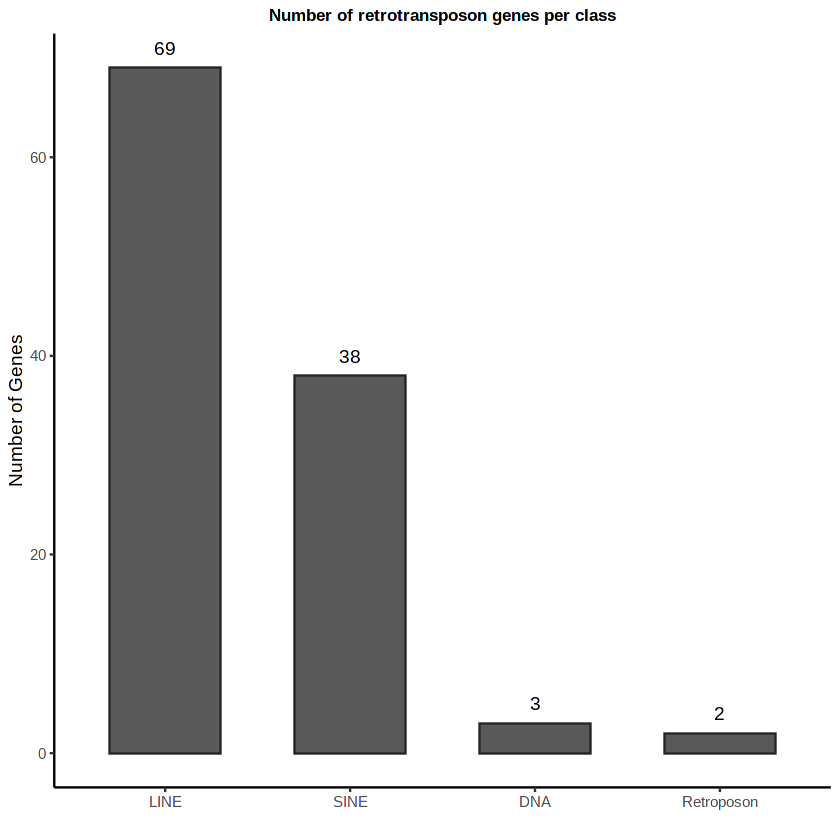

In [32]:
# create bar plot
lightgray = "#D0D3D4"
darkgray = "#252525"

#### GBM vs NCS ####
p <- c7.upreg %>% group_by(TE_class) %>% summarize(nGenes = length(gene_id)) %>%
    ggplot(aes(x=reorder(TE_class,(-nGenes)), y=nGenes)) + geom_bar( stat="identity", width = 0.6, position="dodge", color=darkgray) + 
        ggtitle("Number of retrotransposon genes per class") + labs(y = "Number of Genes", x = "") +
        geom_text(aes(label = nGenes), vjust = -1.0) +
        theme_classic() + theme(plot.title = element_text(hjust = 0.5, size = 10, face = "bold"))
p

# Save figures
size = 7
pdf("/home/samkyy/scratch/gete-gbm/results/2021-10-14/r_GBMSC_DEG-TE-C7_barbyclass-upreg.pdf", width = size, height = size)
p
dev.off()

png 
  2

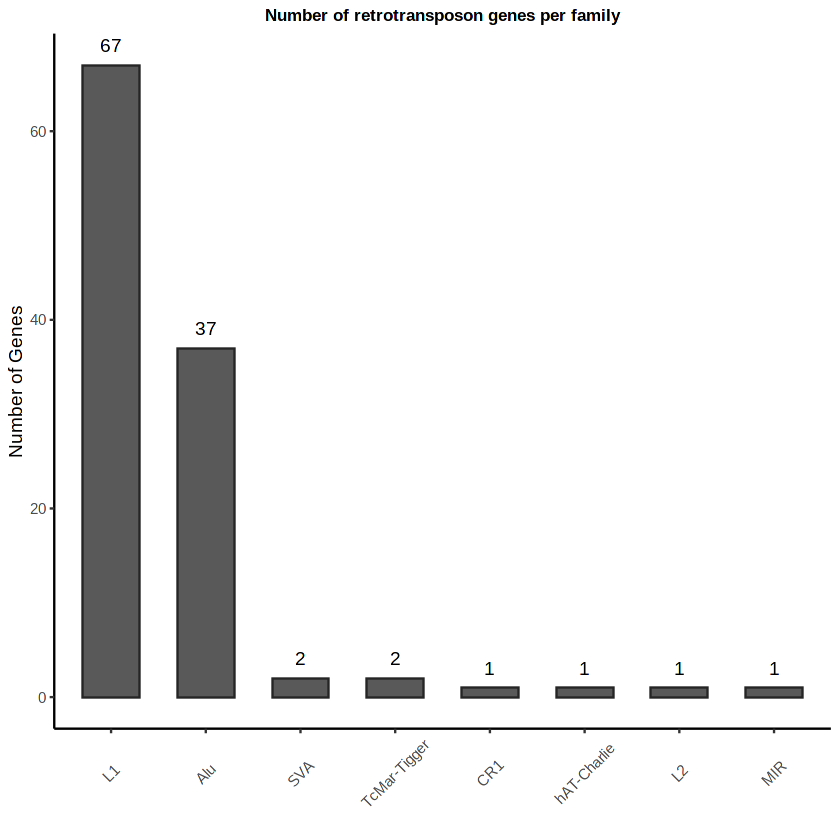

In [31]:
# create bar plot
lightgray = "#D0D3D4"
darkgray = "#252525"

#### GBM vs NCS ####
p <- c7.upreg %>% group_by(TE_family) %>% summarize(nGenes = length(gene_id)) %>%
    ggplot(aes(x=reorder(TE_family,(-nGenes)), y=nGenes)) + geom_bar( stat="identity", width = 0.6, position="dodge", color=darkgray) + 
        ggtitle("Number of retrotransposon genes per family") + labs(y = "Number of Genes", x = "") +
        geom_text(aes(label = nGenes), vjust = -1.0) +
        theme_classic() + theme(plot.title = element_text(hjust = 0.5, size = 10, face = "bold")) +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5))
p

# Save figures
size = 7
pdf("/home/samkyy/scratch/gete-gbm/results/2021-10-14/r_GBMSC_DEG-TE-C7_barbyfamily-upreg.pdf", width = size, height = size)
p
dev.off()

`summarise()` has grouped output by 'TE_class'. You can override using the `.groups` argument.



png 
  2

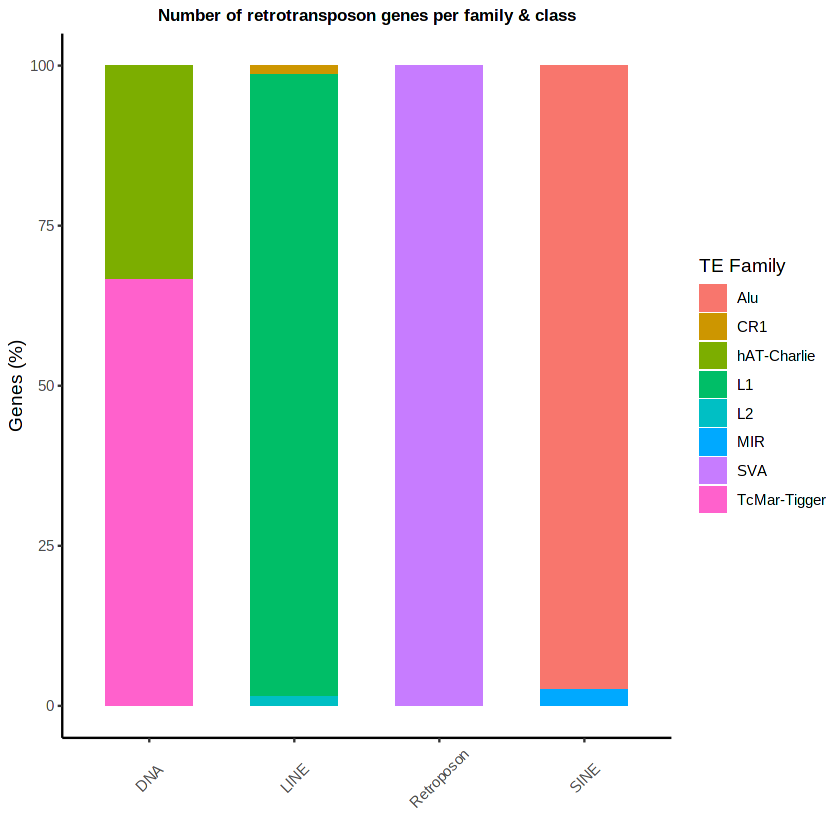

In [33]:
# create bar plot
lightgray <- "#D0D3D4"
darkgray <- "#252525"

#### GBM vs NCS ####
p <- c7.upreg %>% group_by(TE_class, TE_family) %>% 
        summarize(nGenes = length(gene_id)) %>% mutate(perc = nGenes/sum(nGenes)) %>%
    ggplot(aes(x=TE_class, y=perc*100, fill=TE_family)) + geom_bar( stat="identity", width = 0.6) + 
        ggtitle("Number of retrotransposon genes per family & class") + labs(y = "Genes (%)", x = "", fill="TE Family") +
        theme_classic() + theme(plot.title = element_text(hjust = 0.5, size = 10, face = "bold")) +
        theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5))
p

# Save figures
size = 7
pdf("/home/samkyy/scratch/gete-gbm/results/2021-10-14/r_GBMSC_DEG-TE-C7_barbyclassfamily-upreg.pdf", width = size, height = size)
p
dev.off()

## GBM vs GSC group analysis
2021-11-25:

In [20]:
c7.GBM <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-10-14/cluster7.GBMmarkers.rds")
c7.GBM <- c7.GBM %>% tibble::rownames_to_column(var = "gene_id")
c7.NSC <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-10-14/cluster7.NCSmarkers.rds")
c7.NSC <- c7.NSC%>% tibble::rownames_to_column(var = "gene_id")

In [21]:
## Overview of differentially expressed genes in 
head(c7.GBM)
summary(c7.GBM$p_adj_FDR)
summary(c7.GBM$nlog10p.FDR)
head(c7.NSC)
summary(c7.NSC$p_adj_FDR)
summary(c7.NSC$nlog10p.FDR)

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,nlog10p.adj,p_adj_FDR,nlog10p.FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,IGFBP2,1.091533e-248,-4.221090,0.154,0.860,3.547591e-244,243.4501,1.507407e-245,244.8218
2,NOVA1,2.314177e-191,-2.086224,0.479,0.973,7.521307e-187,186.1237,1.597939e-188,187.7964
3,CKB,5.467835e-156,-2.267760,0.236,0.791,1.777101e-151,150.7503,2.517027e-153,152.5991
4,TSFM,4.144443e-151,-2.544499,0.032,0.506,1.346986e-146,145.8706,1.430869e-148,147.8444
5,FLAM-C,2.479654e-150,1.606307,0.921,0.717,8.059123e-146,145.0937,6.848804e-148,147.1644
6,MARCH9,1.204882e-147,-2.975844,0.053,0.529,3.915987e-143,142.4072,2.773237e-145,144.5570


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.00465 0.00000 0.94864 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0229   8.3608  13.7560  18.9795  21.7726 244.8218 

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,IGFBP2,1.091533e-248,4.221090,0.860,0.154,3.547591e-244,1.507407e-245,243.4501,244.8218
2,NOVA1,2.314177e-191,2.086224,0.973,0.479,7.521307e-187,1.597939e-188,186.1237,187.7964
3,CKB,5.467835e-156,2.267760,0.791,0.236,1.777101e-151,2.517027e-153,150.7503,152.5991
4,TSFM,4.144443e-151,2.544499,0.506,0.032,1.346986e-146,1.430869e-148,145.8706,147.8444
5,FLAM-C,2.479654e-150,-1.606307,0.717,0.921,8.059123e-146,6.848804e-148,145.0937,147.1644
6,MARCH9,1.204882e-147,2.975844,0.529,0.053,3.915987e-143,2.773237e-145,142.4072,144.5570


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.00465 0.00000 0.94864 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0229   8.3608  13.7560  18.9795  21.7726 244.8218 

In [22]:
## Significantly Upregulated TEs in GBM and NSC populations

matched_GBM <- intersect(te_genes$gene_id, c7.GBM$gene_id)
length(matched_GBM)
head(matched_GBM, 20)

matched_NSC <- intersect(te_genes$gene_id, c7.NSC$gene_id)
length(matched_NSC)
head(matched_NSC, 20)

[1] 151

[1] "L1MC5a" "MER5B"  "MIR3"   "L2a"    "L3"     "MLT1K"  "MIR"    "L2b"   
 [9] "L2c"    "MER33"  "MIRb"   "L1MB3"  "MIRc"   "AluJo"  "L1MB5"  "AluJr" 
[17] "AluSz6" "L1MA8"  "L1M5"   "L1MA9"

[1] 151

[1] "L1MC5a" "MER5B"  "MIR3"   "L2a"    "L3"     "MLT1K"  "MIR"    "L2b"   
 [9] "L2c"    "MER33"  "MIRb"   "L1MB3"  "MIRc"   "AluJo"  "L1MB5"  "AluJr" 
[17] "AluSz6" "L1MA8"  "L1M5"   "L1MA9"

In [23]:
c7.GBM.te <- merge(c7.GBM, te_genes, by = "gene_id")
dim(c7.GBM.te)

c7.NSC.te <- merge(c7.NSC, te_genes, by = "gene_id")
dim(c7.NSC.te)

[1] 151  11

[1] 151  11

In [24]:
head(c7.GBM.te)
head(c7.NSC.te)

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,nlog10p.adj,p_adj_FDR,nlog10p.FDR,TE_class,TE_family
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,(GAATG)n,2.788379e-40,1.3396027,0.235,0.005,9.062510e-36,35.04275,2.731029e-39,38.56367,Satellite,Satellite
2,7SK,1.135907e-21,0.8251025,0.401,0.188,3.691812e-17,16.43276,4.117291e-21,20.38539,RNA,RNA
3,AluJb,5.848222e-65,0.3707980,1.000,1.000,1.900731e-60,59.72108,1.718382e-63,62.76488,SINE,Alu
4,AluJo,1.305059e-56,0.3653367,1.000,1.000,4.241573e-52,51.37247,2.612010e-55,54.58303,SINE,Alu
5,AluJr,8.200397e-44,0.3274408,1.000,1.000,2.665211e-39,38.57427,9.132861e-43,42.03939,SINE,Alu
6,AluSc5,2.386382e-17,0.2689506,0.991,0.983,7.755981e-13,12.11036,6.091670e-17,16.21526,SINE,Alu


,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR,TE_class,TE_family
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,(GAATG)n,2.788379e-40,-1.3396027,0.005,0.235,9.062510e-36,2.731029e-39,35.04275,38.56367,Satellite,Satellite
2,7SK,1.135907e-21,-0.8251025,0.188,0.401,3.691812e-17,4.117291e-21,16.43276,20.38539,RNA,RNA
3,AluJb,5.848222e-65,-0.3707980,1.000,1.000,1.900731e-60,1.718382e-63,59.72108,62.76488,SINE,Alu
4,AluJo,1.305059e-56,-0.3653367,1.000,1.000,4.241573e-52,2.612010e-55,51.37247,54.58303,SINE,Alu
5,AluJr,8.200397e-44,-0.3274408,1.000,1.000,2.665211e-39,9.132861e-43,38.57427,42.03939,SINE,Alu
6,AluSc5,2.386382e-17,-0.2689506,0.983,0.991,7.755981e-13,6.091670e-17,12.11036,16.21526,SINE,Alu


png 
  2

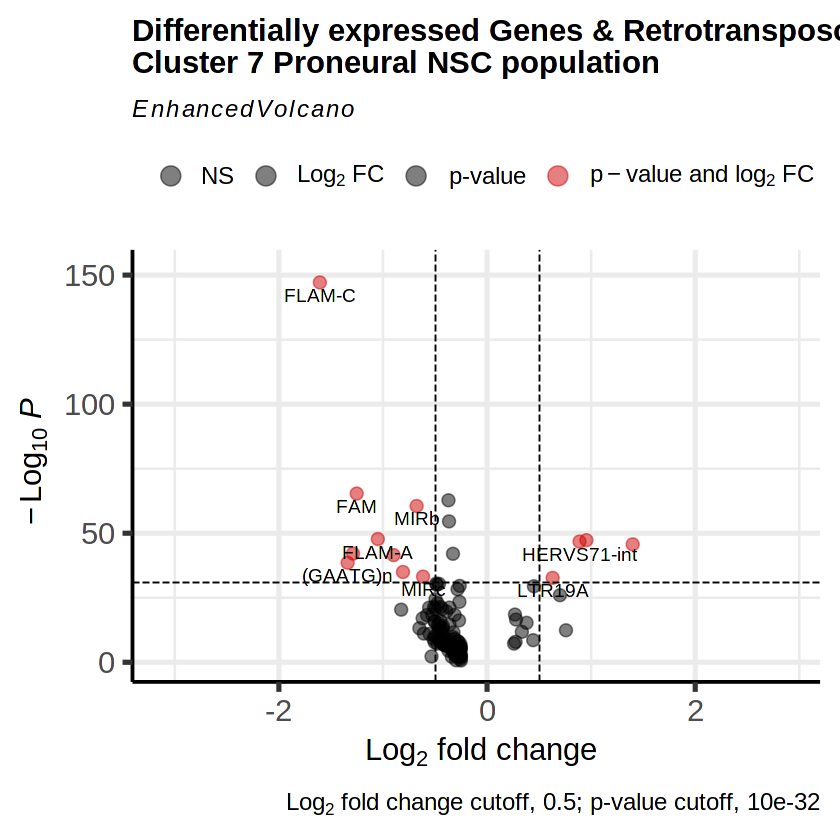

In [103]:
## Volcano plot of all differentially expressed genes
library(EnhancedVolcano)

p <- EnhancedVolcano(c7.NSC.te,
                    lab = c7.NSC.te$gene_id,
                    x = 'avg_log2FC',
                    y = 'p_adj_FDR',
                    title = 'Differentially expressed Genes & Retrotransposons\nCluster 7 Proneural NSC population',
                    pCutoff = 10e-32,   # p-value cut-off (more strict than default 10e-06)
                    FCcutoff = 0.5,     # log2FC cut-off (less strict than the default 2)
                    pointSize = 3.0, labSize = 4.0, col=c('black', 'black', 'black', 'red3'),
                    colAlpha = 0.5,       # opacity (0-100%)
                    caption = bquote(~Log[2]~ "fold change cutoff, 0.5; p-value cutoff, 10e-32"),
               )
p

# Save figures
size = 7
pdf("/home/samkyy/scratch/gete-gbm/results/2021-10-14/r_GBMSC_DEGs-C7NSC-TE.pdf", width = size, height = size)
p
dev.off()

png 
  2

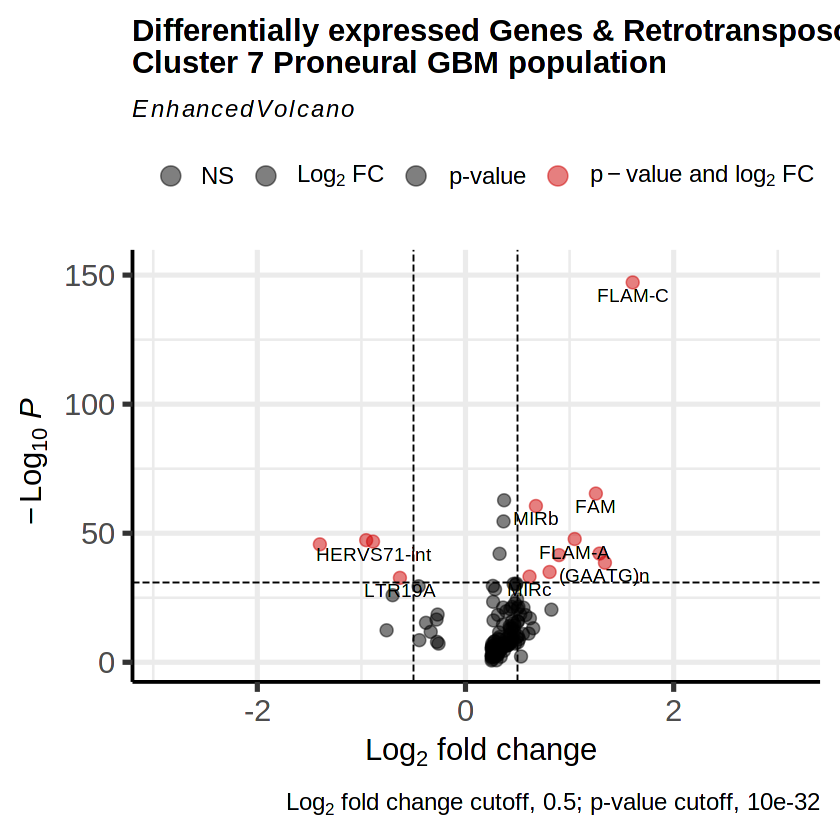

In [104]:
p <- EnhancedVolcano(c7.GBM.te,
                    lab = c7.GBM.te$gene_id,
                    x = 'avg_log2FC',
                    y = 'p_adj_FDR',
                    title = 'Differentially expressed Genes & Retrotransposons\nCluster 7 Proneural GBM population',
                    pCutoff = 10e-32,   # p-value cut-off (more strict than default 10e-06)
                    FCcutoff = 0.5,     # log2FC cut-off (less strict than the default 2)
                    pointSize = 3.0, labSize = 4.0, col=c('black', 'black', 'black', 'red3'),
                    colAlpha = 0.5,       # opacity (0-100%)
                    caption = bquote(~Log[2]~ "fold change cutoff, 0.5; p-value cutoff, 10e-32"),
               )
p

# Save figures
size = 7
pdf("/home/samkyy/scratch/gete-gbm/results/2021-10-14/r_GBMSC_DEGs-C7GBM-TE.pdf", width = size, height = size)
p
dev.off()

FLAM-C is a monomeric Alu family and are one of the oldest types of Alu elements (older than AluJ). https://mobilednajournal.biomedcentral.com/articles/10.1186/s13100-017-0107-y

In [116]:
c7.GBM.te[grep("FAM", c7.GBM.te$gene_id),]

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,nlog10p.adj,p_adj_FDR,nlog10p.FDR,TE_class,TE_family
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
20,FAM,1.269006e-67,1.252464,0.684,0.351,4.124396e-63,62.38464,4.274383e-66,65.36913,SINE,Alu


Fossil Alu Monomer (FAM) is an ancestor of free left and free right Alu monomers (FRAM, FLAM). https://www.ncbi.nlm.nih.gov/pmc/articles/PMC312495/

In [37]:
c7.GBM.upreg <- c7.GBM.te %>% dplyr::filter(p_adj_FDR <= 0.05 & avg_log2FC > 0.5)
head(c7.GBM.upreg)
dim(c7.GBM.upreg)
c7.NSC.upreg <- c7.NSC.te %>% dplyr::filter(p_adj_FDR <= 0.05 & avg_log2FC > 0.5)
head(c7.NSC.upreg)
dim(c7.NSC.upreg)

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,nlog10p.adj,p_adj_FDR,nlog10p.FDR,TE_class,TE_family
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,(GAATG)n,2.788379e-40,1.3396027,0.235,0.005,9.062510e-36,35.042751,2.731029e-39,38.563674,Satellite,Satellite
2,7SK,1.135907e-21,0.8251025,0.401,0.188,3.691812e-17,16.432760,4.117291e-21,20.385388,RNA,RNA
3,AluYi6,5.432497e-03,0.5332965,0.273,0.227,1.000000e+00,0.000000,5.594540e-03,2.252236,SINE,Alu
4,Charlie2a,6.597226e-12,0.5516969,0.313,0.181,2.144164e-07,6.668742,1.071855e-11,10.969864,DNA,hAT-Charlie
5,FAM,1.269006e-67,1.2524644,0.684,0.351,4.124396e-63,62.384640,4.274383e-66,65.369127,SINE,Alu
6,FLAM-A,1.147564e-49,1.0492064,0.679,0.440,3.729697e-45,44.428326,1.741522e-48,47.759071,SINE,Alu


[1] 24 11

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR,TE_class,TE_family
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,HERVS71-int,1.160639e-48,0.8884301,0.372,0.107,3.772192e-44,1.705151e-47,43.423406,46.76824,LTR,ERV1
2,L1M3e,2.215001e-13,0.7580647,0.370,0.214,7.198975e-09,4.003817e-13,8.142729,12.39753,LINE,L1
3,L1M4c,1.970260e-27,0.7002859,0.998,0.998,6.403542e-23,1.022906e-26,22.193580,25.99016,LINE,L1
4,LTR19A,2.538606e-34,0.6301131,0.309,0.091,8.250723e-30,1.958556e-33,29.083508,32.70806,LTR,ERV1
5,MER101,3.265263e-49,0.9544643,0.380,0.105,1.061243e-44,4.901443e-48,43.974185,47.30968,LTR,ERV1
6,MLT1K,1.525461e-47,1.3992349,0.649,0.406,4.957901e-43,2.025636e-46,42.304702,45.69344,LTR,ERVL-MaLR


[1]  6 11

In [121]:
dim(c7.GBM.te %>% dplyr::filter(avg_log2FC > 0))[1]/1160 *100 
dim(c7.NSC.te %>% dplyr::filter(avg_log2FC > 0))[1]/1160 *100 

[1] 11.81034

[1] 1.206897

Out of the 1160 retrotransposons detected in the GBM and NSC dataset, GBM population is upregulated in 11.81% of retrotransposons compared to NSC population which is upregulated in 1.21% of detected retrotransposons. 

In [122]:
dim(c7.GBM.te %>% dplyr::filter(avg_log2FC < 0))[1]/1160 *100 
dim(c7.NSC.te %>% dplyr::filter(avg_log2FC < 0))[1]/1160 *100 

[1] 1.206897

[1] 11.81034

Similarly, NSC cells are downregulated the retrotransposons GBM cells were upregulated in. 

In [36]:
dim(c7.GBM.upreg)[1]/1160 *100 
dim(c7.NSC.upreg)[1]/1160 *100 

[1] 2.068966

[1] 0.5172414

Out of the 1160 transposable elements detected in the GBM and NSC dataset, GBM population is upregulated in 2.07% of them compared to NSC population which is upregulated in 0.52%.

### %Line and Alu in GBM vs NSC populations

In [126]:
# c7.GBM.up <- c7.GBM.te %>% dplyr::filter(avg_log2FC > 0)
# c7.NSC.up <- c7.NSC.te %>% dplyr::filter(avg_log2FC > 0)

In [127]:
# length(grep("SINE",c7.GBM.up$TE_class))
# length(grep("LINE",c7.GBM.up$TE_class))

# length(grep("Alu",c7.GBM.up$TE_family))
# length(grep("L1",c7.GBM.up$TE_family))

# print("================================")

# length(grep("SINE",c7.NSC.up$TE_class))
# length(grep("LINE",c7.NSC.up$TE_class))

# length(grep("Alu",c7.NSC.up$TE_family))
# length(grep("L1",c7.NSC.up$TE_family))

[1] 22

[1] 58

[1] 18

[1] 52

[1] "================================"


[1] 0

[1] 4

[1] 0

[1] 4

In [128]:
# 18/22
# 52/58

[1] 0.8181818

[1] 0.8965517

- Of the 22 SINE class retrotransposons upregulated in GBM popn, 18 of them are Alu elements (81.81%). 
- Of the 58 LINE class retrotransposons upregulated in GBM pop7, 52 of them are L1 retrotransposons (89.66%)

- In contrast, no Alu elements are upregulated in NSC population, and 4 L1 elements are upregulated. 

In [82]:
# dim(te_detected %>% dplyr::filter(TE_class == "SINE" ))
# dim(te_detected %>% dplyr::filter(TE_class == "LINE" ))

# dim(te_detected %>% dplyr::filter(TE_family == "Alu" ))
# dim(te_detected %>% dplyr::filter(TE_family == "L1" ))

[1] 57  3

[1] 167   3

[1] 51  3

[1] 132   3

In [84]:
# 51/57
# 132/167

[1] 0.8947368

[1] 0.7904192

- Of the 57 SINE family retrotransposons, Alu elements represent 51 of them (or 89.47%). 
- Of the 167 LINE family retrotransposons, L1 elements represent 132 of them (or 79.04%). 

In [129]:
# 18/51
# 18/57

# 52/132
# 52/167

[1] 0.3529412

[1] 0.3157895

[1] 0.3939394

[1] 0.3113772

GBM population is upregulated in 35.29% of Alu elements which is 31.58% of all SINE class retrotransposons, while 39.40% of all detected L1 are upregulated which represented 31.14% of all LINE elements. 

In [38]:
length(grep("SINE",c7.GBM.upreg$TE_class))
length(grep("LINE",c7.GBM.upreg$TE_class))

length(grep("Alu",c7.GBM.upreg$TE_family))
length(grep("L1",c7.GBM.upreg$TE_family))

print("================================")

length(grep("SINE",c7.NSC.upreg$TE_class))
length(grep("LINE",c7.NSC.upreg$TE_class))

length(grep("Alu",c7.NSC.upreg$TE_family))
length(grep("L1",c7.NSC.upreg$TE_family))

[1] 7

[1] 7

[1] 5

[1] 5

[1] "================================"


[1] 0

[1] 2

[1] 0

[1] 2

In [39]:
5/7

[1] 0.7142857

- Of the 7 SINE & LINE class retrotransposons upregulated in GBM popn, 5 of them are Alu & L1 elements (71.14%). 
- In contrast, no Alu elements are upregulated in NSC population, and 2 L1 elements are upregulated.

In [82]:
dim(te_detected %>% dplyr::filter(TE_class == "SINE" ))
dim(te_detected %>% dplyr::filter(TE_class == "LINE" ))

dim(te_detected %>% dplyr::filter(TE_family == "Alu" ))
dim(te_detected %>% dplyr::filter(TE_family == "L1" ))

[1] 57  3

[1] 167   3

[1] 51  3

[1] 132   3

In [47]:
dim(te_detected %>% dplyr::filter(TE_family == "Alu" ))[1]/dim(te_detected %>% dplyr::filter(TE_class == "SINE" ))[1]
dim(te_detected %>% dplyr::filter(TE_family == "L1" ))[1]/dim(te_detected %>% dplyr::filter(TE_class == "LINE" ))[1]

[1] 0.8947368

[1] 0.7904192

In [48]:
length(grep("Alu",c7.GBM.upreg$TE_family))/dim(te_detected %>% dplyr::filter(TE_family == "Alu" ))[1]
length(grep("Alu",c7.GBM.upreg$TE_family))/dim(te_detected %>% dplyr::filter(TE_class == "SINE" ))[1]

length(grep("L1",c7.GBM.upreg$TE_family))/dim(te_detected %>% dplyr::filter(TE_family == "L1" ))[1]
length(grep("L1",c7.GBM.upreg$TE_family))/dim(te_detected %>% dplyr::filter(TE_class == "LINE" ))[1]

[1] 0.09803922

[1] 0.0877193

[1] 0.03787879

[1] 0.02994012

GBM population is upregulated in 9.80% of Alu elements which is 8.77% of all SINE class retrotransposons, while 39.40% of all detected L1 are upregulated which represented 31.14% of all LINE elements. 

In [49]:
length(grep("Alu",c7.NSC.upreg$TE_family))/dim(te_detected %>% dplyr::filter(TE_family == "Alu" ))[1]
length(grep("Alu",c7.NSC.upreg$TE_family))/dim(te_detected %>% dplyr::filter(TE_class == "SINE" ))[1]

length(grep("L1",c7.NSC.upreg$TE_family))/dim(te_detected %>% dplyr::filter(TE_family == "L1" ))[1]
length(grep("L1",c7.NSC.upreg$TE_family))/dim(te_detected %>% dplyr::filter(TE_class == "LINE" ))[1]

[1] 0

[1] 0

[1] 0.01515152

[1] 0.01197605

NSC population is upregulated in no Alu or SINE elements, while 1.51% of all detected L1 are upregulated which represented 1.20% of all LINE elements. 

In [50]:
c7.GBM.upreg$gene_id

[1] "(GAATG)n"  "7SK"       "AluYi6"    "Charlie2a" "FAM"       "FLAM-A"   
 [7] "FLAM-C"    "FRAM"      "L1MB4"     "L1ME3Cz"   "L1ME3E"    "L1ME3G"   
[13] "L1ME4a"    "L2"        "L3"        "MER103C"   "MER41B"    "MER4C"    
[19] "MIRb"      "MIRc"      "SVA-D"     "SVA-E"     "SVA-F"     "Tigger4a"

In [51]:
c7.NSC.upreg$gene_id

[1] "HERVS71-int" "L1M3e"       "L1M4c"       "LTR19A"      "MER101"     
[6] "MLT1K"

In [52]:
c7.upreg$gene_id

[1] "AluJb"     "AluJo"     "AluJr"     "AluJr4"    "AluSc"     "AluSc5"   
  [7] "AluSc8"    "AluSg"     "AluSg4"    "AluSg7"    "AluSp"     "AluSq"    
 [13] "AluSq10"   "AluSq2"    "AluSq4"    "AluSx"     "AluSx1"    "AluSx3"   
 [19] "AluSx4"    "AluSz"     "AluSz6"    "AluY"      "AluYa5"    "AluYb8"   
 [25] "AluYc"     "AluYe5"    "AluYf1"    "AluYg6"    "AluYh3"    "AluYj4"   
 [31] "AluYk2"    "AluYk3"    "AluYk4"    "AluYm1"    "Charlie1a" "FAM"      
 [37] "FLAM-C"    "FRAM"      "HAL1"      "L1HS"      "L1M1"      "L1M2"     
 [43] "L1M3"      "L1M4"      "L1M4c"     "L1M5"      "L1MA1"     "L1MA2"    
 [49] "L1MA3"     "L1MA4"     "L1MA4A"    "L1MA5"     "L1MA6"     "L1MA7"    
 [55] "L1MA8"     "L1MA9"     "L1MB1"     "L1MB3"     "L1MB4"     "L1MB7"    
 [61] "L1MB8"     "L1MC1"     "L1MC2"     "L1MC3"     "L1MC5"     "L1MC5a"   
 [67] "L1MCa"     "L1MD"      "L1MD1"     "L1MD2"     "L1MDa"     "L1ME1"    
 [73] "L1ME2"     "L1ME3"     "L1ME3A"    "L1ME3B"    "L1ME3E"    "L1ME3G"   
 [79] "L1ME4b"    "L1MEc"     "L1MEd"     "L1MEf"     "L1MEg"     "L1P2"     
 [85] "L1P3"      "L1PA10"    "L1PA11"    "L1PA13"    "L1PA14"    "L1PA15"   
 [91] "L1PA16"    "L1PA17"    "L1PA2"     "L1PA3"     "L1PA4"     "L1PA5"    
 [97] "L1PA6"     "L1PA7"     "L1PA8"     "L1PA8A"    "L1PB1"     "L1PB2"    
[103] "L1PB3"     "L1PB4"     "L1PREC2"   "L2a"       "L3"        "MIRb"     
[109] "SVA-D"     "SVA-F"     "Tigger1"   "Tigger3b"

In [53]:
write.csv(c7.GBM.upreg,"~/scratch/gete-gbm/results/2021-10-14/gbmsc_gte_gbm_cluster7te-upreg.csv", row.names= FALSE)
write.csv(c7.NSC.upreg,"~/scratch/gete-gbm/results/2021-10-14/gbmsc_gte_nsc_cluster7te-upreg.csv", row.names= FALSE)
write.csv(c7.upreg,"~/scratch/gete-gbm/results/2021-10-14/gbmsc_gte_all_cluster7te-upreg.csv", row.names= FALSE)

## GBM vs NSC counts
2022-01-26:

In [2]:
setwd("/scratch/samkyy/gete-gbm/results/2022-01-24")

In [3]:
## load seurat objects (also another copy in GBMSC_GSEA-aug31)
gbmsc.gte <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [6]:
# c7.df <- gbmsc.gte@meta.data %>% 
#             dplyr::filter(integrated_snn_res.0.3 == '7') %>%
#             dplyr::select(c(mitoRatio, sample, sampleCombined, teRatio, gbm_subtype)) %>%
#             tibble::rownames_to_column("cells") %>% separate(cells, c("sampleType",NA, NA))

In [12]:
## Number of cells per sample and cluster
meta <- gbmsc.gte@meta.data %>%
            dplyr::select(c(integrated_snn_res.0.3, sampleCombined)) %>%
            dplyr::add_rownames("cells") %>% separate(cells, c("sampleType",NA, NA))
colnames(meta) <- c(colnames(meta)[1], "cluster", colnames(meta)[3:length(colnames(meta))])
head(meta)

sampleType,cluster,sampleCombined
<chr>,<fct>,<fct>
GBM,1,SF11232
GBM,4,SF11232
GBM,0,SF11232
GBM,0,SF11232
GBM,2,SF11232
GBM,2,SF11232


In [32]:
counts <- meta %>% group_by(sampleType, cluster, sampleCombined) %>% summarize(nCells = length(sampleCombined))
head(counts)
tail(counts)

`summarise()` has grouped output by 'sampleType', 'cluster'. You can override using the `.groups` argument.



sampleType,cluster,sampleCombined,nCells
<chr>,<fct>,<fct>,<int>
GBM,0,SF11159,566
GBM,0,SF11209,2101
GBM,0,SF11215,896
GBM,0,SF11232,615
GBM,0,SF11247,179
GBM,0,SF11285,3057


sampleType,cluster,sampleCombined,nCells
<chr>,<fct>,<fct>,<int>
SC,9,SRR10353960,23
SC,9,SRR10353961,73
SC,9,SRR10353962,153
SC,10,SRR10353960,3
SC,10,SRR10353961,7
SC,10,SRR10353962,92


In [18]:
write.csv(counts, file="gbmsc_GBMNSC_cellcounts.csv", row.names=FALSE)

In [33]:
counts <- counts %>% ungroup %>% group_by(cluster) %>% mutate(percCells = 100 * nCells/sum(nCells))

In [34]:
head(counts)

sampleType,cluster,sampleCombined,nCells,percCells
<chr>,<fct>,<fct>,<int>,<dbl>
GBM,0,SF11159,566,6.450142
GBM,0,SF11209,2101,23.943020
GBM,0,SF11215,896,10.210826
GBM,0,SF11232,615,7.008547
GBM,0,SF11247,179,2.039886
GBM,0,SF11285,3057,34.837607


In [22]:
write.csv(counts, file="gbmsc_GBMNSC_cellcounts.csv", row.names=FALSE)

In [35]:
counts <- counts %>% ungroup %>% group_by(cluster) %>% mutate(nCellsxCluster = sum(nCells)) 
head(counts)

sampleType,cluster,sampleCombined,nCells,percCells,nCellsxCluster
<chr>,<fct>,<fct>,<int>,<dbl>,<int>
GBM,0,SF11159,566,6.450142,8775
GBM,0,SF11209,2101,23.943020,8775
GBM,0,SF11215,896,10.210826,8775
GBM,0,SF11232,615,7.008547,8775
GBM,0,SF11247,179,2.039886,8775
GBM,0,SF11285,3057,34.837607,8775


In [29]:
counts %>% dplyr::filter(cluster == '7') %>% group_by(sampleType, cluster) %>% mutate(sum(nCells))

sampleType,cluster,sampleCombined,nCells,percCells,sum(nCells)
<chr>,<fct>,<fct>,<int>,<dbl>,<int>
GBM,7,SF11159,86,4.197169,1385
GBM,7,SF11209,152,7.418253,1385
GBM,7,SF11215,70,3.416301,1385
GBM,7,SF11232,113,5.514885,1385
GBM,7,SF11247,364,17.764763,1385
GBM,7,SF11285,600,29.282577,1385
SC,7,SRR10353960,363,17.715959,664
SC,7,SRR10353961,132,6.442167,664
SC,7,SRR10353962,169,8.247926,664


In [36]:
counts <- counts %>% group_by(sampleType, cluster) %>% mutate(nCellsxTypexCluster = sum(nCells))
head(counts)

sampleType,cluster,sampleCombined,nCells,percCells,nCellsxCluster,nCellsxTypexCluster
<chr>,<fct>,<fct>,<int>,<dbl>,<int>,<int>
GBM,0,SF11159,566,6.450142,8775,7414
GBM,0,SF11209,2101,23.943020,8775,7414
GBM,0,SF11215,896,10.210826,8775,7414
GBM,0,SF11232,615,7.008547,8775,7414
GBM,0,SF11247,179,2.039886,8775,7414
GBM,0,SF11285,3057,34.837607,8775,7414


In [37]:
write.csv(counts, file="gbmsc_GBMNSC_cellcounts.csv", row.names=FALSE)

## nCells per cluster per library
- 2022-01-27: Started
- 2022-01-30: Completed

In [2]:
setwd("/scratch/samkyy/gete-gbm/results/2022-01-24")

In [3]:
## load seurat objects (also another copy in GBMSC_GSEA-aug31)
gbmsc.gte <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [5]:
## Number of cells per sample and cluster
meta <- gbmsc.gte@meta.data %>%
            dplyr::select(c(integrated_snn_res.0.3, sampleCombined)) 
colnames(meta) <- c("cluster", colnames(meta)[2:length(colnames(meta))])
head(meta)

,cluster,sampleCombined
,<fct>,<fct>
GBM_AAACCTGCAATTCCTT-1,1,SF11232
GBM_AAACCTGCACAGAGGT-1,4,SF11232
GBM_AAACCTGGTGTGGCTC-1,0,SF11232
GBM_AAACGGGGTCCGAATT-1,0,SF11232
GBM_AAACGGGTCGAATGGG-1,2,SF11232
GBM_AAAGATGGTCTCAACA-1,2,SF11232


In [7]:
dim(meta)

[1] 49670     2

In [6]:
counts <- meta %>% group_by(cluster, sampleCombined) %>% summarize(nCells = length(sampleCombined))
dim(counts)

`summarise()` has grouped output by 'cluster'. You can override using the `.groups` argument.



[1] 99  3

In [8]:
head(counts)

cluster,sampleCombined,nCells
<fct>,<fct>,<int>
0,SF11159,566
0,SF11209,2101
0,SF11215,896
0,SF11232,615
0,SF11247,179
0,SF11285,3057


In [9]:
write.csv(counts, file="gbmsc_GBMNSC_cellsBYclusterBYsample.csv", row.names=FALSE)

## nCells per Cluster
2022-01-30:

In [2]:
setwd("/scratch/samkyy/gete-gbm/results/2022-01-24")

In [3]:
## load seurat objects (also another copy in GBMSC_GSEA-aug31)
gbmsc.gte <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [18]:
## Number of cells per sample and cluster
meta <- gbmsc.gte@meta.data %>%
            dplyr::select(c(integrated_snn_res.0.3)) %>% tibble::rownames_to_column("cells")
colnames(meta) <- c("cells", "cluster")
head(meta)

,cells,cluster
,<chr>,<fct>
1,GBM_AAACCTGCAATTCCTT-1,1
2,GBM_AAACCTGCACAGAGGT-1,4
3,GBM_AAACCTGGTGTGGCTC-1,0
4,GBM_AAACGGGGTCCGAATT-1,0
5,GBM_AAACGGGTCGAATGGG-1,2
6,GBM_AAAGATGGTCTCAACA-1,2


In [11]:
dim(meta)

[1] 49670     1

In [19]:
counts <- meta %>% group_by(cluster) %>% summarize(nCells = length(cells))
dim(counts)

[1] 11  2

In [20]:
head(counts)

cluster,nCells
<fct>,<int>
0,8775
1,8534
2,8090
3,7056
4,4998
5,4421


In [21]:
write.csv(counts, file="gbmsc_GBMNSC_cellsBYcluster.csv", row.names=FALSE)

## Bar Plots and Pie Chart Corrections
2022-01-30:

In [2]:
setwd("/scratch/samkyy/gete-gbm/results/2022-01-24")

In [3]:
## load seurat objects (also another copy in GBMSC_GSEA-aug31)
gbmsc.gte <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [2]:
setwd("/scratch/samkyy/gete-gbm/results/2022-01-24")

In [3]:
## load seurat objects (also another copy in GBMSC_GSEA-aug31)
gbmsc.gte <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [22]:
meta <- gbmsc.gte@meta.data %>%
            dplyr::select(c(integrated_snn_res.0.3, mitoRatio, sample, sampleCombined, teRatio, gbm_subtype)) %>%
            dplyr::add_rownames("cells") %>% separate(cells, c("sampleType",NA, NA))
colnames(meta) <- c(colnames(meta)[1], "cluster", colnames(meta)[3:length(colnames(meta))])
head(meta)

sampleType,cluster,mitoRatio,sample,sampleCombined,teRatio,gbm_subtype
<chr>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<chr>
GBM,1,0.005923887,SF11232_1,SF11232,28.69794,Classical-Mesenchymal
GBM,4,0.046620828,SF11232_1,SF11232,31.89670,Mesenchymal
GBM,0,0.038901602,SF11232_1,SF11232,45.13094,Classical
GBM,0,0.042615417,SF11232_1,SF11232,49.49516,Classical
GBM,2,0.040313949,SF11232_1,SF11232,39.06529,Classical-Proneural
GBM,2,0.013255645,SF11232_1,SF11232,24.85069,Classical-Proneural


In [24]:
meta$sampleType <- factor(meta$sampleType, levels=c("GBM", "SC"), labels=c("Zhang et al. 2020", "Wang et al. 2020"))

In [2]:
setwd("/scratch/samkyy/gete-gbm/results/2022-01-24")

In [3]:
## load seurat objects (also another copy in GBMSC_GSEA-aug31)
gbmsc.gte <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [28]:
# create bar plot
lightgray = "#D0D3D4"
darkgray = "#252525"

#### GBM vs NCS ####
p <- meta %>% group_by(sampleType, cluster, gbm_subtype) %>% summarize(nCells = length(sampleType)) %>%
    ggplot(aes(x=cluster, y=nCells, fill=sampleType)) + geom_bar( stat="identity", width = 0.6, position="dodge") + 
        theme_classic() + scale_fill_manual(values = c(lightgray, darkgray)) + labs(y = "Number of cells", x = "Cluster") +
        theme(plot.title = element_text(hjust = 0.5, size = 10, face = "bold")) +
        guides(fill=guide_legend(title="Sample Origin"))

`summarise()` has grouped output by 'sampleType', 'cluster'. You can override using the `.groups` argument.



png 
  2

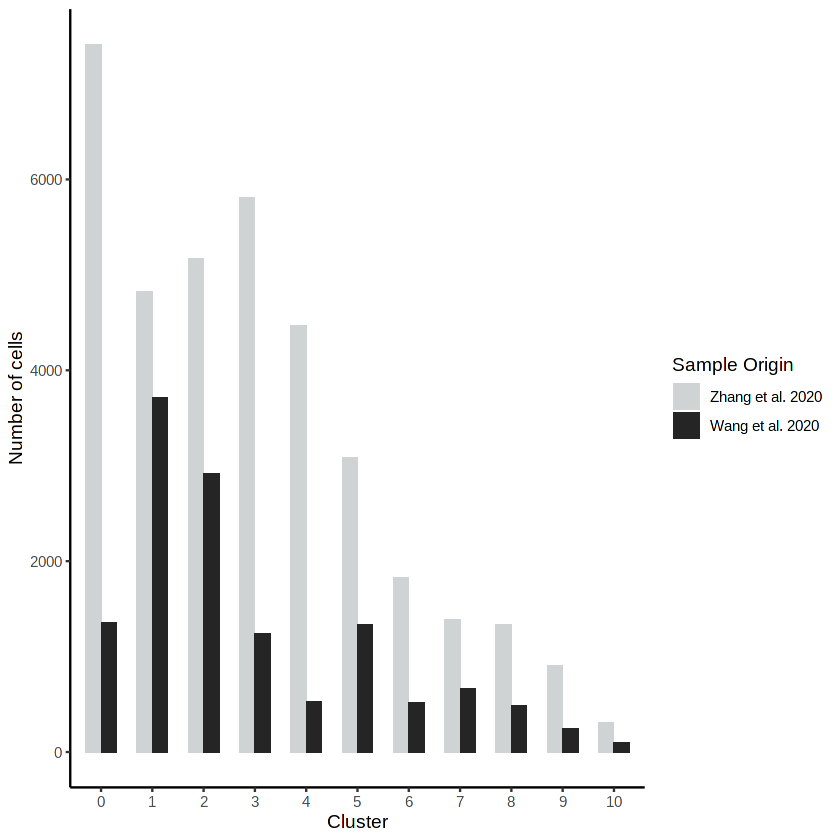

In [29]:
size = 7
pdf("r_GBMSC_sampleCompositionALL_paperlabels.pdf", width = size, height = size)
grid.arrange(p, top="GBM+GSC: PC20r0.3, hg38+retrotransposons") #retrotransposons
dev.off()

p
ggsave("r_gbmsc_sampleCompositionALL_paperlabels.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

In [31]:
p <- meta %>% 
        group_by(sampleType, cluster, gbm_subtype) %>% 
        summarize(nCells = length(sampleType)) %>%
        ungroup %>%
        group_by(cluster) %>% 
        mutate(per = 100 * nCells/sum(nCells)) %>%
    ggplot(aes(x=cluster, y=per, fill=sampleType)) + geom_bar( stat="identity", width = 0.6) +
        theme_classic() + scale_fill_manual(values = c(lightgray, darkgray)) + labs(y = "Cells (%)", x = "Cluster") +
        theme(plot.title = element_text(hjust = 0.5, size = 10, face = "bold")) +
        guides(fill=guide_legend(title="Sample Origin"))

`summarise()` has grouped output by 'sampleType', 'cluster'. You can override using the `.groups` argument.



png 
  2

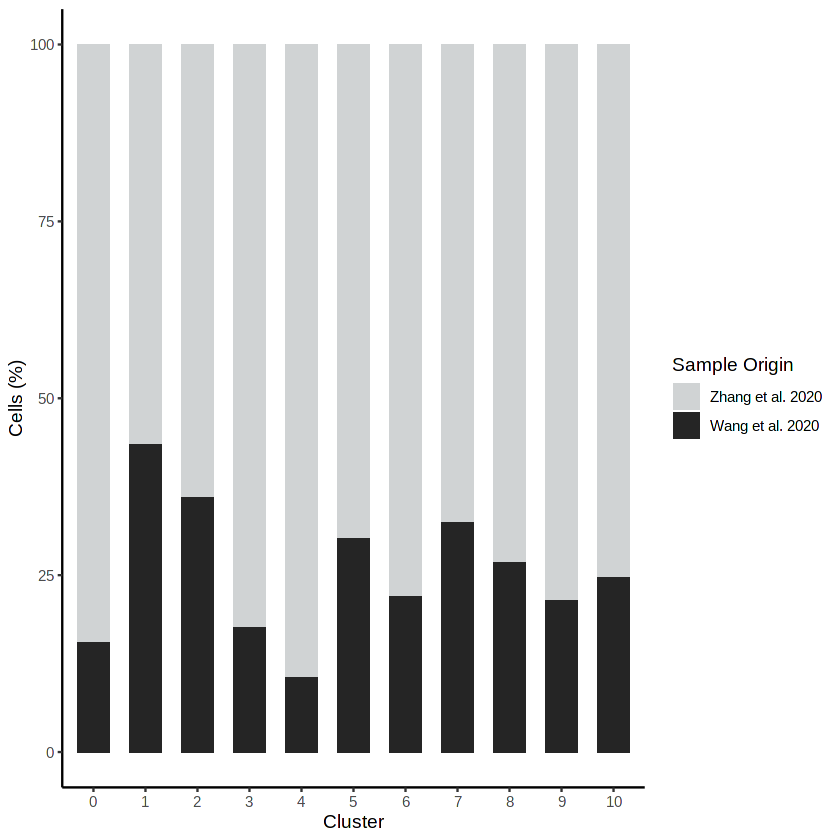

In [32]:
size = 7
pdf("r_GBMSC_sampleCompositionALL_paperlabels_perc.pdf", width = size, height = size)
grid.arrange(p, top="GBM+GSC: PC20r0.3, hg38+retrotransposons") #retrotransposons
dev.off()

p
ggsave("r_gbmsc_sampleCompositionALL_paperlabels_perc.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

In [33]:
c7.df <- gbmsc.gte@meta.data %>% 
            dplyr::filter(integrated_snn_res.0.3 == '7') %>%
            dplyr::select(c(mitoRatio, sample, sampleCombined, teRatio, gbm_subtype)) %>%
            dplyr::add_rownames("cells") %>% separate(cells, c("sampleType",NA, NA))

head(c7.df)

sampleType,mitoRatio,sample,sampleCombined,teRatio,gbm_subtype
<chr>,<dbl>,<fct>,<fct>,<dbl>,<chr>
GBM,0.0128440367,SF11232_1,SF11232,72.58716,Proneural
GBM,0.0572341662,SF11232_1,SF11232,62.65253,Proneural
GBM,0.0705906149,SF11232_1,SF11232,28.53964,Proneural
GBM,0.0538210624,SF11232_1,SF11232,58.43430,Proneural
GBM,0.0005367687,SF11232_1,SF11232,51.95921,Proneural
GBM,0.0044782803,SF11232_1,SF11232,68.42812,Proneural


In [36]:
c7.df$sampleType <- factor(c7.df$sampleType, levels=c("GBM", "SC"), labels=c("Zhang et al. 2020", "Wang et al. 2020"))

In [62]:
sym <- "%"
p <- c7.df %>% 
        group_by(sampleType) %>% 
        summarize(nCells = length(sampleType)) %>%
        mutate(per = 100 * nCells/sum(nCells)) %>%
    ggplot(aes(x = "", y = per, fill=sampleType))+ geom_bar(stat = "identity", width = 1.5) + coord_polar("y") +
        geom_text(aes(label = paste(round(per), sym)),
                  position = position_stack(vjust = 0.5)) +
        theme_minimal() + scale_fill_manual(values = c(lightgray, "grey50")) +
        theme(axis.text.x=element_blank()) + 
#         ggtitle("% of Cells per Sample Origin Type") + 
        labs(y = "", x = "") +
        theme(axis.text = element_blank(),
              axis.ticks = element_blank(),
              panel.grid  = element_blank(),
              plot.title = element_text(hjust = 0.5, size = 10, face = "bold")) +
        guides(fill=guide_legend(title="Sample Origin"))

png 
  2

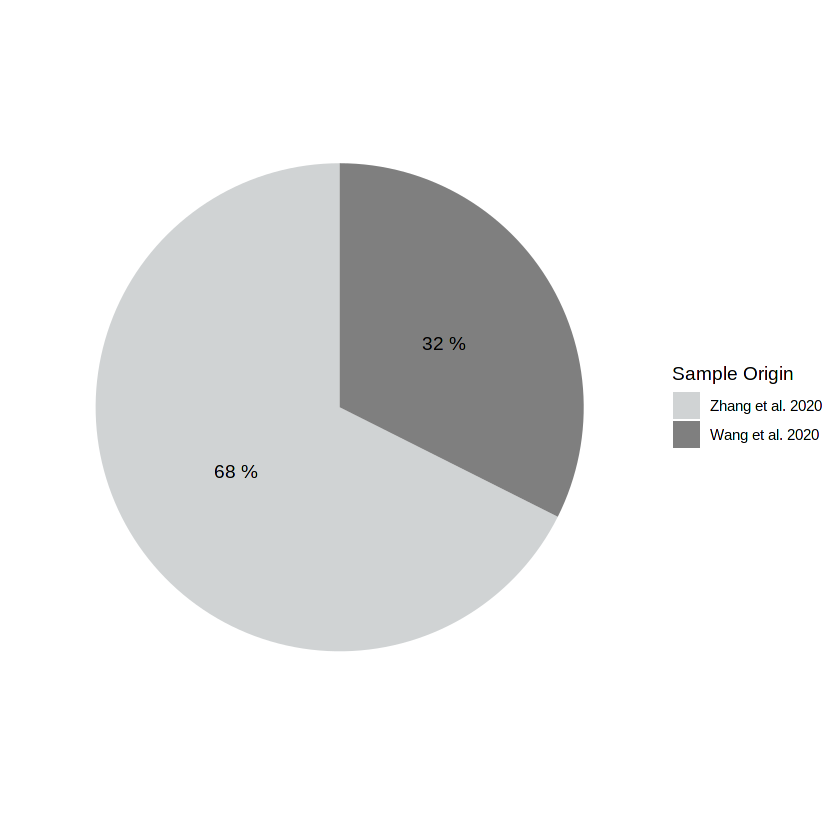

In [64]:
size = 7
pdf("r_GBMSC_c7composition_paperlabels_perc.pdf", width = size, height = size)
grid.arrange(p, top="GBM+GSC: PC20r0.3, hg38+retrotransposons") #retrotransposons
dev.off()

p
ggsave("r_gbmsc_c7composition_paperlabels_perc.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

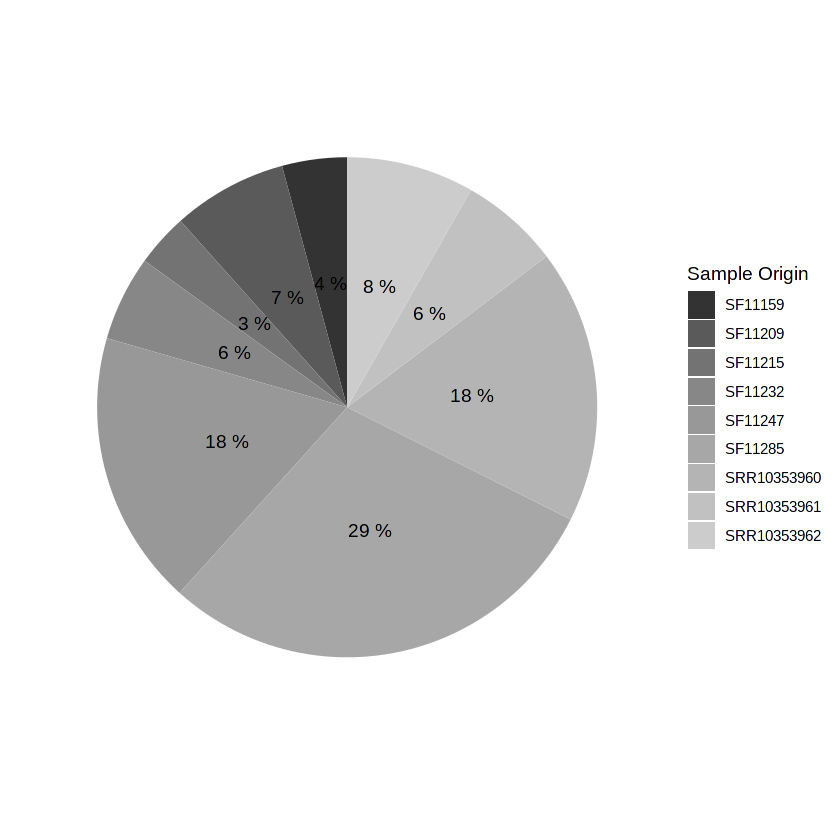

In [69]:
p <- c7.df %>% 
        group_by(sampleCombined) %>% 
        summarize(nCells = length(sampleCombined)) %>%
        mutate(per = 100 * nCells/sum(nCells)) %>%
    ggplot(aes(x = "", y = per, fill=sampleCombined))+ geom_bar(stat = "identity", width = 1.5) + coord_polar("y") +
        geom_text(aes(label = paste(round(per), "%")),
                  position = position_stack(vjust = 0.5)) +
        theme_minimal() + scale_fill_grey() +
        theme(axis.text.x=element_blank()) + 
#         ggtitle("% of Cells per Sample Origin") + 
        labs(y = "", x = "") +
        theme(axis.text = element_blank(),
              axis.ticks = element_blank(),
              panel.grid  = element_blank(),
              plot.title = element_text(hjust = 0.5, size = 10, face = "bold")) +
        guides(fill=guide_legend(title="Sample Origin"))
p

## Gene Ontology (GO) of Cluster 7
- 2022-01-24: Created GO results
- 2022-01-27: Analysis of cancer-related genes

In [10]:
c7.GBM <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-10-14/cluster7.GBMmarkers.rds")
c7.GBM <- c7.GBM %>% tibble::rownames_to_column(var = "gene")
c7.NSC <- readRDS("/home/samkyy/scratch/gete-gbm/results/2021-10-14/cluster7.NCSmarkers.rds")
c7.NSC <- c7.NSC%>% tibble::rownames_to_column(var = "gene")

In [11]:
# add cluster ID column
c7.GBM$cluster <- as.integer(7)
c7.NSC$cluster <- as.integer(7)

In [12]:
head(c7.GBM)
head(c7.NSC)

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,nlog10p.adj,p_adj_FDR,nlog10p.FDR,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,IGFBP2,1.091533e-248,-4.221090,0.154,0.860,3.547591e-244,243.4501,1.507407e-245,244.8218,7
2,NOVA1,2.314177e-191,-2.086224,0.479,0.973,7.521307e-187,186.1237,1.597939e-188,187.7964,7
3,CKB,5.467835e-156,-2.267760,0.236,0.791,1.777101e-151,150.7503,2.517027e-153,152.5991,7
4,TSFM,4.144443e-151,-2.544499,0.032,0.506,1.346986e-146,145.8706,1.430869e-148,147.8444,7
5,FLAM-C,2.479654e-150,1.606307,0.921,0.717,8.059123e-146,145.0937,6.848804e-148,147.1644,7
6,MARCH9,1.204882e-147,-2.975844,0.053,0.529,3.915987e-143,142.4072,2.773237e-145,144.5570,7


,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,p_adj_FDR,nlog10p.adj,nlog10p.FDR,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,IGFBP2,1.091533e-248,4.221090,0.860,0.154,3.547591e-244,1.507407e-245,243.4501,244.8218,7
2,NOVA1,2.314177e-191,2.086224,0.973,0.479,7.521307e-187,1.597939e-188,186.1237,187.7964,7
3,CKB,5.467835e-156,2.267760,0.791,0.236,1.777101e-151,2.517027e-153,150.7503,152.5991,7
4,TSFM,4.144443e-151,2.544499,0.506,0.032,1.346986e-146,1.430869e-148,145.8706,147.8444,7
5,FLAM-C,2.479654e-150,-1.606307,0.717,0.921,8.059123e-146,6.848804e-148,145.0937,147.1644,7
6,MARCH9,1.204882e-147,2.975844,0.529,0.053,3.915987e-143,2.773237e-145,142.4072,144.5570,7


In [13]:
#run geneontology for the two objects
GBM.GO <- geneontology(c7.GBM)
NSC.GO <- geneontology(c7.NSC)

[1] "7"
[1] "extracting gene symbols by cluster"
[1] "Length of cluster_id : 1"
[1] "Number of non-unique genes in cluster7 = 0"
[1] "converted gene symbols to entrez ids"
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"
Warning message in rm(data):
"object 'data' not found"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:7gene ontology analysis complete."
[1] "7"
[1] "extracting gene symbols by cluster"
[1] "Length of cluster_id : 1"
[1] "Number of non-unique genes in cluster7 = 0"
[1] "converted gene symbols to entrez ids"
[1] "BP"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"
Warning message in rm(data):
"object 'data' not found"


[1] "MF"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "CC"


Warning message in makeValidParams(.Object):
"converting geneIds from list to atomic vector via unlist"


[1] "Cluster:7gene ontology analysis complete."


In [14]:
mkdirToday()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2022-01-24"


In [15]:
saveRDS(GBM.GO, file="gbmsc_c7_markersGO_GBM.rds")
saveRDS(NSC.GO, file="gbmsc_c7_markersGO_NSC.rds")

In [16]:
GBM.GO <- makeGOsummary(GBM.GO)
NSC.GO <- makeGOsummary(NSC.GO)

Number of clusters:  1 
Cluster names:  7 
Beginning summary of cluster  7 
BP computed 
MF computed 
CC computed 
Number of clusters:  1 
Cluster names:  7 
Beginning summary of cluster  7 
BP computed 
MF computed 
CC computed 


In [17]:
write.csv(GBM.GO, "gbmsc_c7_GOsummary_GBM.csv")
write.csv(NSC.GO, "gbmsc_c7_GOsummary_NSC.csv")

In [20]:
head(GBM.GO)
head(NSC.GO)

,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,GO:0006614,SRP-dependent cotranslational protein targeting to membrane,BP,3.531320e-75,2.959952e-71,70.52872,52.14506,6.188911,79,105,7
2,GO:0000184,"nuclear-transcribed mRNA catabolic process, nonsense-mediated decay",BP,7.179365e-74,3.008872e-70,69.52160,38.62346,7.073041,83,120,7
3,GO:0006613,cotranslational protein targeting to membrane,BP,5.732379e-73,1.601627e-69,68.79544,45.18219,6.424679,79,109,7
4,GO:0045047,protein targeting to ER,BP,2.700190e-72,5.658248e-69,68.24732,37.11579,7.073041,82,120,7
5,GO:0072599,establishment of protein localization to endoplasmic reticulum,BP,1.810430e-70,3.035004e-67,66.51784,33.57337,7.308809,82,124,7
6,GO:0070972,protein localization to endoplasmic reticulum,BP,3.572110e-68,4.990238e-65,64.30188,23.75366,8.959186,88,152,7


,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,GO:0006614,SRP-dependent cotranslational protein targeting to membrane,BP,3.531320e-75,2.959952e-71,70.52872,52.14506,6.188911,79,105,7
2,GO:0000184,"nuclear-transcribed mRNA catabolic process, nonsense-mediated decay",BP,7.179365e-74,3.008872e-70,69.52160,38.62346,7.073041,83,120,7
3,GO:0006613,cotranslational protein targeting to membrane,BP,5.732379e-73,1.601627e-69,68.79544,45.18219,6.424679,79,109,7
4,GO:0045047,protein targeting to ER,BP,2.700190e-72,5.658248e-69,68.24732,37.11579,7.073041,82,120,7
5,GO:0072599,establishment of protein localization to endoplasmic reticulum,BP,1.810430e-70,3.035004e-67,66.51784,33.57337,7.308809,82,124,7
6,GO:0070972,protein localization to endoplasmic reticulum,BP,3.572110e-68,4.990238e-65,64.30188,23.75366,8.959186,88,152,7


In [22]:
summary(GBM.GO$p.adj <0.05)
summary(NSC.GO$p.adj <0.05)

   Mode   FALSE    TRUE 
logical    9249    1694 

   Mode   FALSE    TRUE 
logical    9249    1694 

In [48]:
GOBarPlots <- function(GOsum, p.threshold = 0.05, topn = 5){
    
    cat("Threshold for p.adj: ", p.threshold, 
        "\nNumber of Top GO terms:", topn, "\n")
    
    ## Initialize output object
    result <- NA
    
    ## Create plots
        
    ## Select top_n (10) Go terms by class
    GOsum_split <- split(GOsum, GOsum$Class)

    if (!is.null(GOsum_split$BP)) {
        top_BP <- top_n(GOsum_split$BP, topn, wt=nlog10p.adj)
    } else {
        top_BP <- data.frame(matrix(ncol = ncol(temp), nrow = 0))
        colnames(top_BP) <- colnames(GOsum)
    }
    if (!is.null(GOsum_split$MF)) {
        top_MF <- top_n(GOsum_split$MF, topn, wt=nlog10p.adj)
    } else {
        top_MF <- data.frame(matrix(ncol = ncol(GOsum), nrow = 0))
        colnames(top_MF) <- colnames(GOsum)
    }
    if (!is.null(GOsum_split$CC)) {
        top_CC <- top_n(GOsum_split$CC, topn, wt=nlog10p.adj)
    } else {
        top_CC <- data.frame(matrix(ncol = ncol(GOsum), nrow = 0))
        colnames(top_CC) <- colnames(GOsum)
    }

    GOsum <- rbind(top_BP, top_MF, top_CC)
    GOsum$GOID <- factor(GOsum$GOID, levels=rev(GOsum$GOID))
    GOsum$Term <- factor(GOsum$Term, levels=rev(GOsum$Term))
    GOsum$Class <- factor(GOsum$Class, levels=unique(GOsum$Class))            

    ## Create the plot
    result <- ggplot(GOsum, aes(x=nlog10p.adj, y=Term, fill=Class)) + 
            geom_bar(stat='identity') + xlab("-log10(p)") + ylab("GO Term") +
            scale_fill_manual("GO Class", values = c("BP" = "slateblue3", "MF" = "lightseagreen", "CC" = "darkgoldenrod1")) +
            geom_text(aes(label=Count), color="azure4", hjust = -0.5) + theme_classic()

    cat("Plots created")
    return(result)
}

In [49]:
GBM.plots <- GOBarPlots(GBM.GO)
NSC.plots <- GOBarPlots(NSC.GO)

Threshold for p.adj:  0.05 
Number of Top GO terms: 5 
Plots createdThreshold for p.adj:  0.05 
Number of Top GO terms: 5 
Plots created

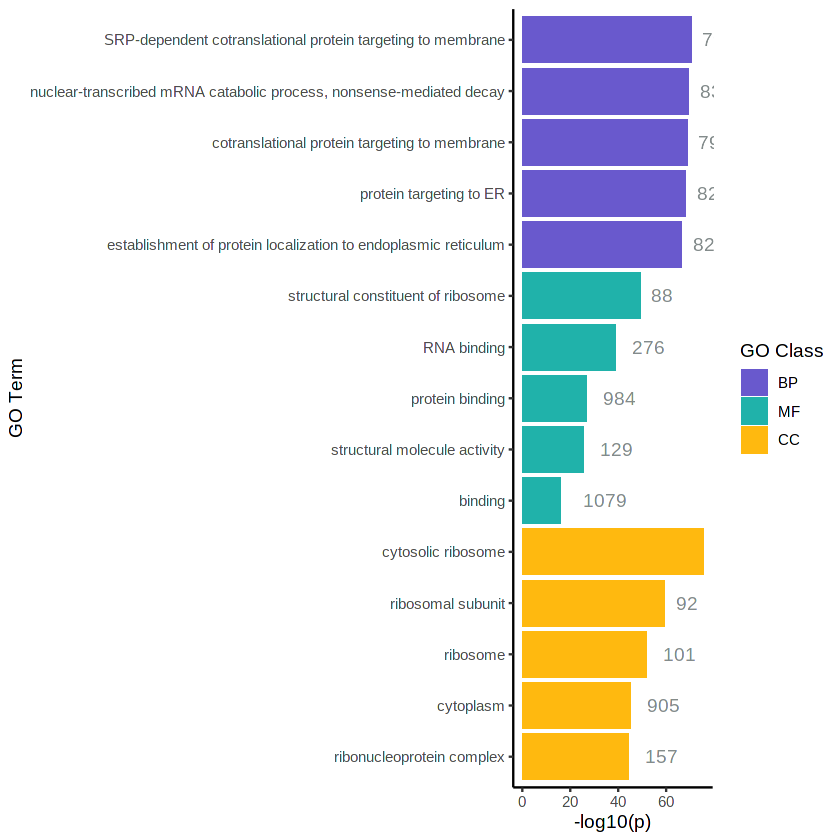

In [50]:
GBM.plots

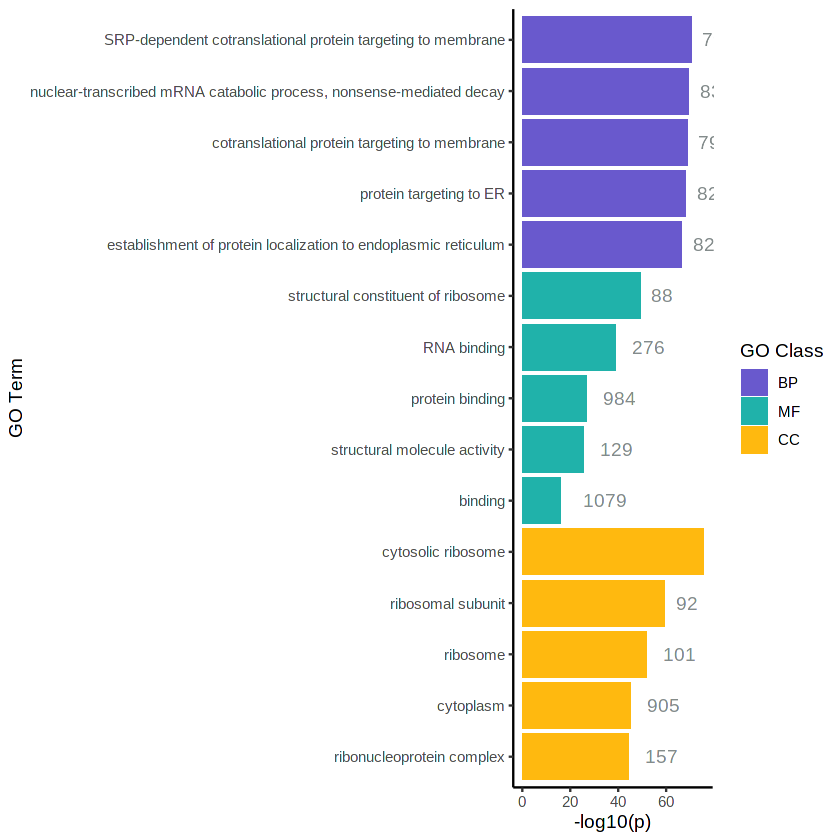

In [51]:
NSC.plots

In [52]:
mkdirToday()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results/2022-01-24"


Warning message in dir.create(file.path(maindir, subdir)):
"'/home/samkyy/scratch/gete-gbm/results/2022-01-24' already exists"


[1] "New working directory: /scratch/samkyy/gete-gbm/results/2022-01-24"


In [53]:
# Save figure of GO Barplots
size = 3
pdf("r_gbmsc_c7_GO_top5_GBM.pdf", width = size*4, height = size)
GBM.plots
dev.off()

size = 3
pdf("r_gbmsc_c7_GO_top5_NSC.pdf", width = size*4, height = size)
NSC.plots
dev.off()

png 
  2

png 
  2

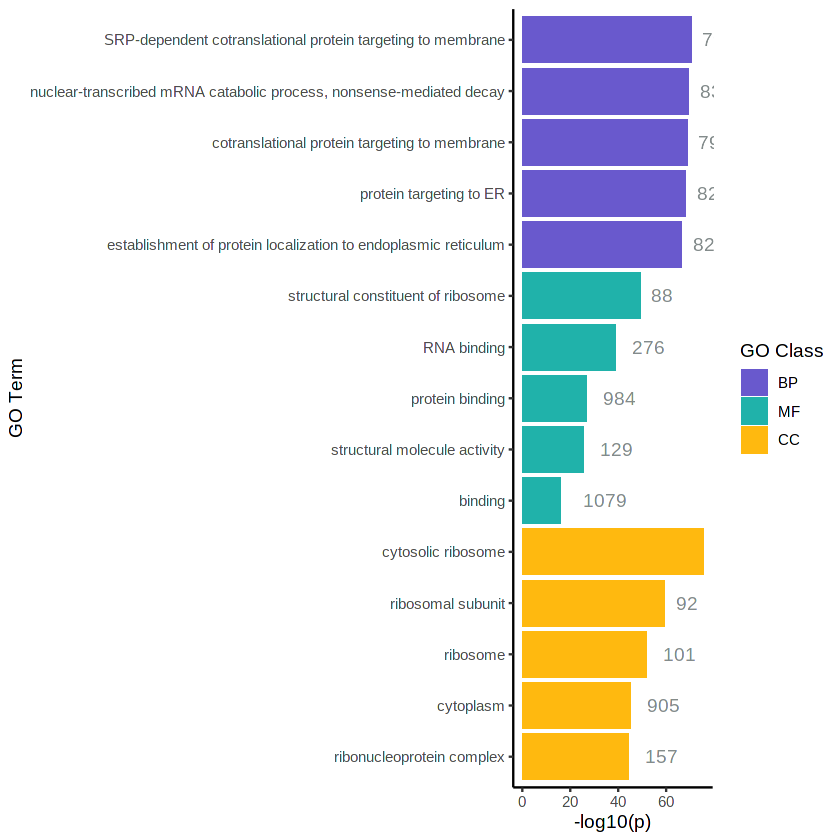

In [54]:
GBM.plots
ggsave("r_gbmsc_c7_GO_top5_GBM.tiff", units="in", width=10, height=3, dpi=300, compression = 'lzw')

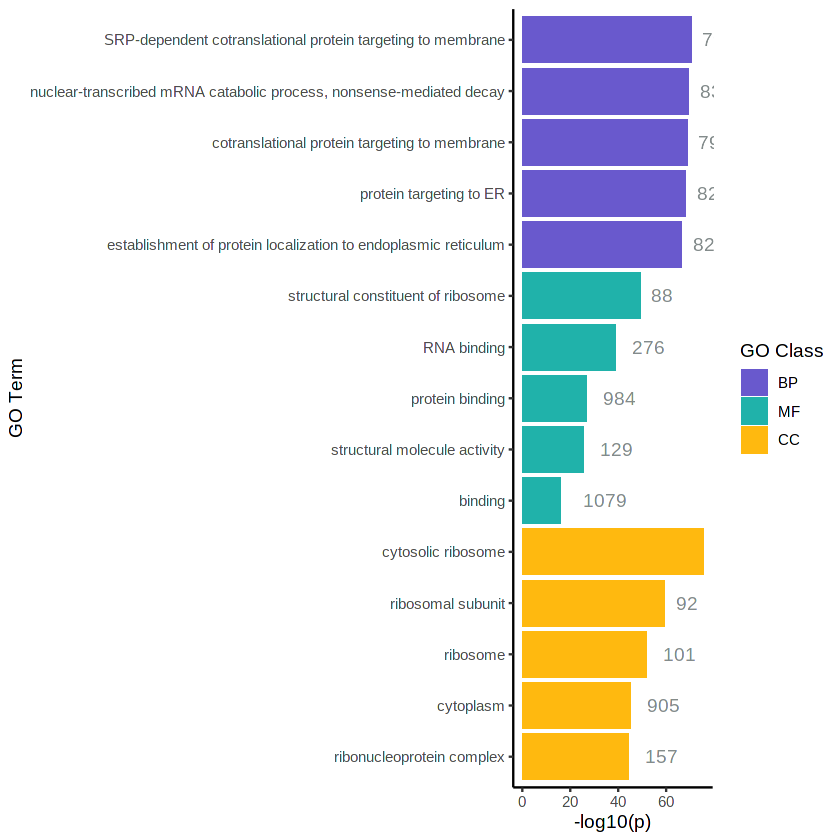

In [55]:
NSC.plots
ggsave("r_gbmsc_c7_GO_top5_NSC.tiff", units="in", width=10, height=3, dpi=300, compression = 'lzw')

### GO: Cancer-related genes:
2022-01-27

In [2]:
setwd("/scratch/samkyy/gete-gbm/results/2022-01-24/")

In [3]:
# load dataframes
GBM.GO <- read.csv("gbmsc_c7_GOsummary_GBM.csv")
NSC.GO <- read.csv("gbmsc_c7_GOsummary_NSC.csv")

In [9]:
dim(GBM.GO)

[1] 10943    12

In [56]:
dim(GBM.GO %>% dplyr::filter(p.adj <= 0.01))

[1] 1138   12

In [26]:
head(GBM.GO, 12)

,X,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,GO:0006614,SRP-dependent cotranslational protein targeting to membrane,BP,3.531320e-75,2.959952e-71,70.52872,52.145059,6.188911,79,105,7
2,2,GO:0000184,"nuclear-transcribed mRNA catabolic process, nonsense-mediated decay",BP,7.179365e-74,3.008872e-70,69.52160,38.623460,7.073041,83,120,7
3,3,GO:0006613,cotranslational protein targeting to membrane,BP,5.732379e-73,1.601627e-69,68.79544,45.182188,6.424679,79,109,7
4,4,GO:0045047,protein targeting to ER,BP,2.700190e-72,5.658248e-69,68.24732,37.115789,7.073041,82,120,7
5,5,GO:0072599,establishment of protein localization to endoplasmic reticulum,BP,1.810430e-70,3.035004e-67,66.51784,33.573370,7.308809,82,124,7
6,6,GO:0070972,protein localization to endoplasmic reticulum,BP,3.572110e-68,4.990238e-65,64.30188,23.753662,8.959186,88,152,7
7,7,GO:0006413,translational initiation,BP,3.079294e-66,3.687235e-63,62.43330,17.379921,11.316866,96,192,7
8,8,GO:0019080,viral gene expression,BP,2.113693e-59,2.214622e-56,55.65470,15.126102,11.493692,91,195,7
9,9,GO:0019083,viral transcription,BP,5.700220e-59,5.308805e-56,55.27500,16.474736,10.491678,87,178,7


In [24]:
head(GBM.GO %>% dplyr::filter((Class == "MF") & p.adj <= 0.01), 10)

,X,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,8383,GO:0003735,structural constituent of ribosome,MF,4.031036e-53,6.018336e-50,49.22052,12.830523,12.305798,88,202,7
2,8384,GO:0003723,RNA binding,MF,2.844357e-42,2.123312e-39,38.67299,2.971946,121.108544,276,1988,7
3,8385,GO:0005515,protein binding,MF,2.915872e-30,1.451132e-27,26.83829,2.611420,834.418374,984,13697,7
4,8386,GO:0005198,structural molecule activity,MF,7.208657e-29,2.690631e-26,25.57015,3.609853,44.471447,129,730,7
5,8387,GO:0005488,binding,MF,3.419682e-19,1.021117e-16,15.99092,3.397724,1000.790323,1079,16428,7
6,8388,GO:0003676,nucleic acid binding,MF,9.880121e-19,2.458503e-16,15.60933,1.808209,262.137860,388,4303,7
7,8389,GO:0019843,rRNA binding,MF,1.281665e-13,2.520452e-11,10.59852,9.429982,3.898867,24,64,7
8,8390,GO:1901363,heterocyclic compound binding,MF,1.428766e-13,2.520452e-11,10.59852,1.587805,378.494660,493,6213,7
9,8391,GO:0050839,cell adhesion molecule binding,MF,1.519362e-13,2.520452e-11,10.59852,2.785529,33.140366,80,544,7


In [13]:
cancer.GO <- GBM.GO %>% dplyr::filter((Class == "BP" | Class == "MF") & 
                                      grepl('oxida|stress|hypoxia|monoxia|prolif|mobil|cell cycle', Term) &
                                      p.adj <= 0.01)
dim(cancer.GO)
head(cancer.GO)
tail(cancer.GO)

[1] 46 12

,X,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,99,GO:0033554,cellular response to stress,BP,1.372987e-15,1.162462e-13,12.934621,1.966825,123.77823,211,2100,7
2,107,GO:0042127,regulation of cell population proliferation,BP,1.861156e-14,1.457963e-12,11.836253,1.997760,104.09159,182,1766,7
3,119,GO:0008283,cell population proliferation,BP,2.840209e-13,2.000558e-11,10.698849,1.876037,120.65430,199,2047,7
4,142,GO:0001666,response to hypoxia,BP,6.869047e-12,4.054673e-10,9.392044,3.122200,21.16018,57,359,7
5,148,GO:0080134,regulation of response to stress,BP,1.556000e-11,8.812429e-10,9.054904,1.912723,90.82964,155,1541,7
6,156,GO:0006950,response to stress,BP,2.609807e-11,1.402269e-09,8.853169,1.583495,245.31665,337,4162,7


,X,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
41,816,GO:0022402,cell cycle process,BP,0.0006227202,0.006396618,2.194050,1.421043,83.815541,113,1422,7
42,848,GO:0044839,cell cycle G2/M phase transition,BP,0.0007675639,0.007586935,2.119934,1.998015,16.091169,30,273,7
43,870,GO:0031098,stress-activated protein kinase signaling cascade,BP,0.0008678958,0.008361727,2.077704,1.933223,17.682604,32,300,7
44,886,GO:1905897,regulation of response to endoplasmic reticulum stress,BP,0.0009518535,0.009005007,2.045516,2.889449,5.422665,14,92,7
45,898,GO:1902749,regulation of cell cycle G2/M phase transition,BP,0.0010444177,0.009748674,2.011054,2.103697,12.790417,25,217,7
46,903,GO:0000086,G2/M transition of mitotic cell cycle,BP,0.0010773667,0.009989477,2.000457,2.003331,14.971271,28,254,7


In [57]:
GBM.GO %>% dplyr::filter(p.adj <= 0.01 & grepl('aging|senescence', Term))

X,GOID,Term,Class,Pvalue,p.adj,nlog10p.adj,OddsRatio,ExpCount,Count,Size,cluster
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
477,GO:0007568,aging,BP,1.270097e-05,0.0002231856,3.651334,2.268293,18.8025,39,319,7


In [59]:
cancer.GO <- rbind(cancer.GO, GBM.GO %>% dplyr::filter(p.adj <= 0.01 & grepl('aging|senescence', Term)))

In [63]:
cancer.GO <- cancer.GO[order(cancer.GO$p.adj,decreasing = FALSE),]

In [48]:
GOBarPlots <- function(GOsum, p.threshold = 0.01, topn = 20){
    
    cat("Threshold for p.adj: ", p.threshold, 
        "\nNumber of Top GO terms:", topn, "\n")
    
    ## Initialize output object
    result <- NA
    
    ## Create plots
        
    ## Select top_n (10) Go terms by class
    GOsum_split <- split(GOsum, GOsum$Class)

    if (!is.null(GOsum_split$BP)) {
        top_BP <- top_n(GOsum_split$BP, topn, wt=nlog10p.adj)
    } else {
        top_BP <- data.frame(matrix(ncol = ncol(temp), nrow = 0))
        colnames(top_BP) <- colnames(GOsum)
    }
    if (!is.null(GOsum_split$MF)) {
        top_MF <- top_n(GOsum_split$MF, topn, wt=nlog10p.adj)
    } else {
        top_MF <- data.frame(matrix(ncol = ncol(GOsum), nrow = 0))
        colnames(top_MF) <- colnames(GOsum)
    }
    if (!is.null(GOsum_split$CC)) {
        top_CC <- top_n(GOsum_split$CC, topn, wt=nlog10p.adj)
    } else {
        top_CC <- data.frame(matrix(ncol = ncol(GOsum), nrow = 0))
        colnames(top_CC) <- colnames(GOsum)
    }

    GOsum <- rbind(top_BP, top_MF, top_CC)
    GOsum$GOID <- factor(GOsum$GOID, levels=rev(GOsum$GOID))
    GOsum$Term <- factor(GOsum$Term, levels=rev(GOsum$Term))
    GOsum$Class <- factor(GOsum$Class, levels=unique(GOsum$Class))            

    ## Create the plot
    result <- ggplot(GOsum, aes(x=nlog10p.adj, y=Term, fill=Class)) + 
            geom_bar(stat='identity') + xlab("-log10(p)") + ylab("GO Term") + 
#             scale_fill_manual("GO Class", values = c("BP" = "slateblue3", "MF" = "lightseagreen", "CC" = "darkgoldenrod1")) +
            scale_fill_manual("GO Class", values = c("BP" = "grey20")) + 
            geom_text(aes(label=Count), color="azure4", hjust = -0.5) + theme_classic() + NoLegend()

    cat("Plots created")
    return(result)
}

In [49]:
GBM.GO.plots <- GOBarPlots(head(GBM.GO, 12))

Threshold for p.adj:  0.01 
Number of Top GO terms: 20 
Plots created

png 
  2

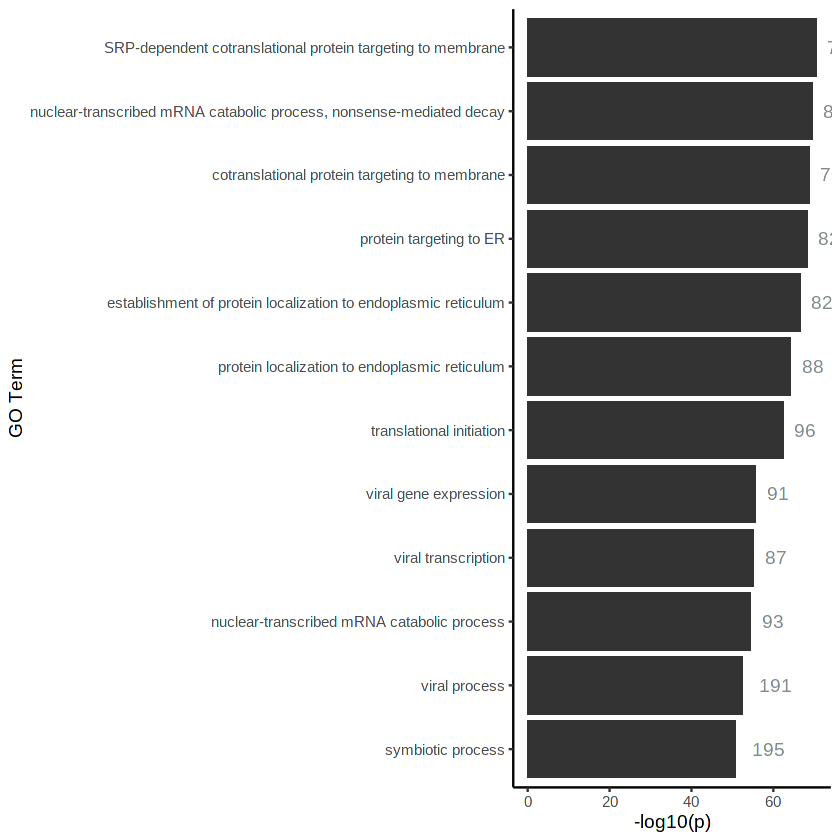

In [53]:
GBM.GO.plots
# Save figure of GO Barplots
ggsave("r_gbmsc_c7_GO_top12_GBM.tiff", units="in", width=10, height=3, dpi=300, compression = 'lzw')

size = 3
pdf("r_gbmsc_c7_GO_top12_GBM.pdf", width = size*4, height = size)
GBM.GO.plots
dev.off()

In [64]:
cancerGO.plots <- GOBarPlots(cancer.GO)

Threshold for p.adj:  0.01 
Number of Top GO terms: 20 
Plots created

png 
  2

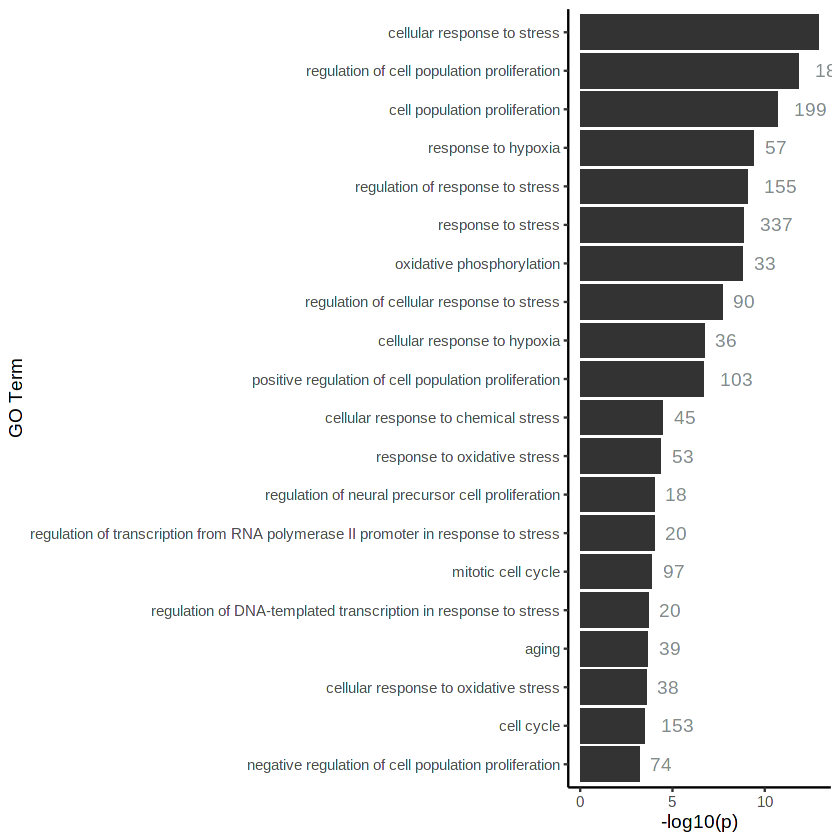

In [66]:
cancerGO.plots
# Save figure of GO Barplots
ggsave("r_gbmsc_c7_GO_cancer20_GBM.tiff", units="in", width=10, height=3, dpi=300, compression = 'lzw')

size = 3
pdf("r_gbmsc_c7_GO_cancer20_GBM.pdf", width = size*4, height = size)
cancerGO.plots
dev.off()

In [67]:
write.csv(cancer.GO, file="gbmsc_c7_GO_cancer_GBM.csv")

## Cluster 7 significance
2022-01-25:

In [2]:
setwd("/scratch/samkyy/gete-gbm/results/2022-01-24")

In [38]:
## load seurat objects (also another copy in GBMSC_GSEA-aug31)
s_objs <- vector(mode="list", length=2)
s_objs[[2]] <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [4]:
summary(s_objs[[2]]$teRatio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.479  19.926  26.122  27.170  33.319  76.405 

In [39]:
## Create table of cluster ID & te_Ratio per cell
df <- s_objs[[2]]@meta.data %>% 
    dplyr::select(c(integrated_snn_res.0.3, teRatio))
head(df)

,integrated_snn_res.0.3,teRatio
,<fct>,<dbl>
GBM_AAACCTGCAATTCCTT-1,1,28.69794
GBM_AAACCTGCACAGAGGT-1,4,31.89670
GBM_AAACCTGGTGTGGCTC-1,0,45.13094
GBM_AAACGGGGTCCGAATT-1,0,49.49516
GBM_AAACGGGTCGAATGGG-1,2,39.06529
GBM_AAAGATGGTCTCAACA-1,2,24.85069


png 
  2

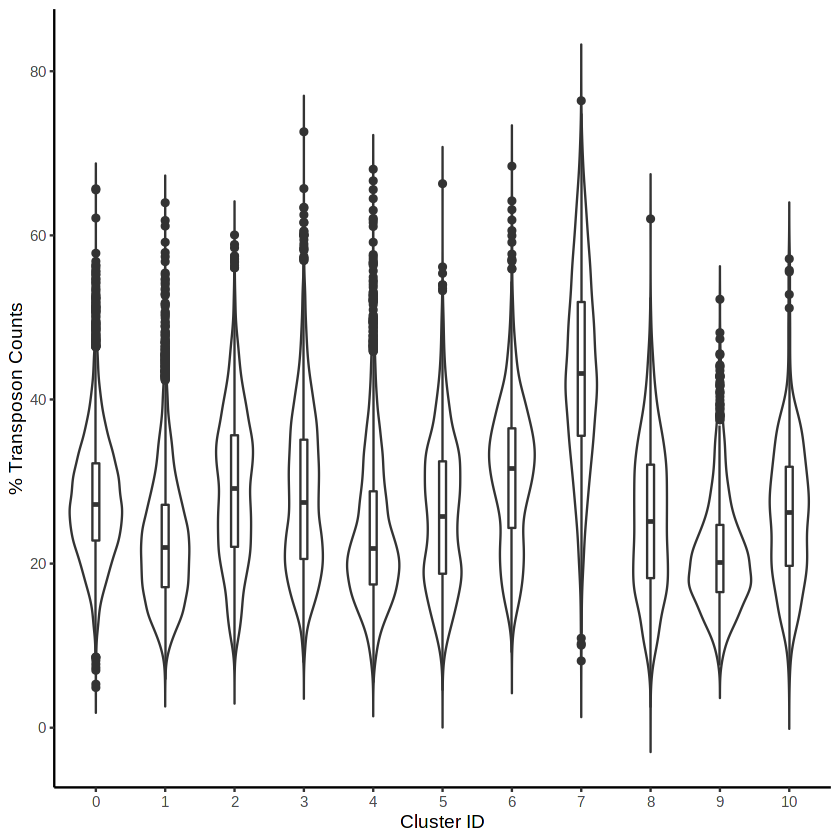

In [18]:
# Basic violin plot
p <- ggplot(df, aes(x=integrated_snn_res.0.3, y=teRatio)) + 
  geom_violin(trim=FALSE) + geom_boxplot(width=0.1) + xlab("Cluster ID") + ylab("% Transposon Counts") +
#   geom_violin(trim=FALSE) + geom_dotplot(binaxis='y', stackdir='center', dotsize=0.1)
  theme_classic()

size = 7

p
ggsave("r_gbmsc_PC20r03_teRatioViolin.tiff", units="in", width=size*1.5, height=size, dpi=300, compression = 'lzw')

pdf("r_gbmsc_PC20r03_teRatioBarViolin.pdf", width = size*1.5, height = size)
p
dev.off()

Before testing the differences in means between each cluster, I first tested whether each group has the same or different variance. If it's different we must perform non-parametric tests.

In [24]:
## Levene's test: Equal Variance Assumption
library(lawstat) # v3.4

levene.test(y = df$teRatio, group = df$`integrated_snn_res.0.3`, location = "median")
levene.test(y = df$teRatio, group = df$`integrated_snn_res.0.3`, location = "mean")
    # H_0: the groups we are comparing have equal variances.
    # Result: the groups we are comparing have different variances, therefore we should not continue with the ANOVA and Post-hoc analysis.


	Modified robust Brown-Forsythe Levene-type test based on the absolute
	deviations from the median

data:  df$teRatio
Test Statistic = 189.23, p-value < 2.2e-16



	Classical Levene's test based on the absolute deviations from the mean
	( none not applied because the location is not set to median )

data:  df$teRatio
Test Statistic = 194.82, p-value < 2.2e-16


Below is an example of ANOVA for parametric tests. However the levene's test says the variance is not the same between groups, therefore we should use the Kruskal-Wallis test instead.

In [25]:
## ANOVA: Categorical Independent Variable x Continuous Dependent variable
summary(stats::aov(teRatio ~ integrated_snn_res.0.3, data = df))
    # H_0: There are no differences between the There are significant differences between groups

                          Df  Sum Sq Mean Sq F value Pr(>F)    
integrated_snn_res.0.3    10  910185   91019    1222 <2e-16 ***
Residuals              49659 3699994      75                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [39]:
## Kruskal-Wallis by rank (non-parametric ANOVA): Is there any difference between the clusters?
kruskal.test(teRatio ~ integrated_snn_res.0.3, data = df)


	Kruskal-Wallis rank sum test

data:  teRatio by integrated_snn_res.0.3
Kruskal-Wallis chi-squared = 7556.4, df = 10, p-value < 2.2e-16


Yes there is a significant difference betwen the groups. Which groups are different from each other?

In [53]:
## Multiple pairwise-comparison between groups
df.wil <- pairwise.wilcox.test(df$teRatio, df$`integrated_snn_res.0.3`, p.adjust.method = "BH")
df.wil


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  df$teRatio and df$integrated_snn_res.0.3 

   0       1       2       3       4       5       6       7       8      
1  < 2e-16 -       -       -       -       -       -       -       -      
2  < 2e-16 < 2e-16 -       -       -       -       -       -       -      
3  0.469   < 2e-16 2.8e-11 -       -       -       -       -       -      
4  < 2e-16 1.4e-05 < 2e-16 < 2e-16 -       -       -       -       -      
5  < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 -       -       -       -      
6  < 2e-16 < 2e-16 1.4e-15 < 2e-16 < 2e-16 < 2e-16 -       -       -      
7  < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 -       -      
8  < 2e-16 < 2e-16 < 2e-16 < 2e-16 4.8e-16 0.088   < 2e-16 < 2e-16 -      
9  < 2e-16 9.5e-12 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16
10 6.3e-05 < 2e-16 1.1e-10 5.8e-05 4.0e-10 0.648   < 2e-16 < 2e-16 0.190  
   9      
1  -      
2  -      
3  -      


In [60]:
write.csv(df.wil$p.value, file="gbmsc_teRatio_wilcox.csv", row.names=TRUE)

In [41]:
library(ggpubr)


Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend




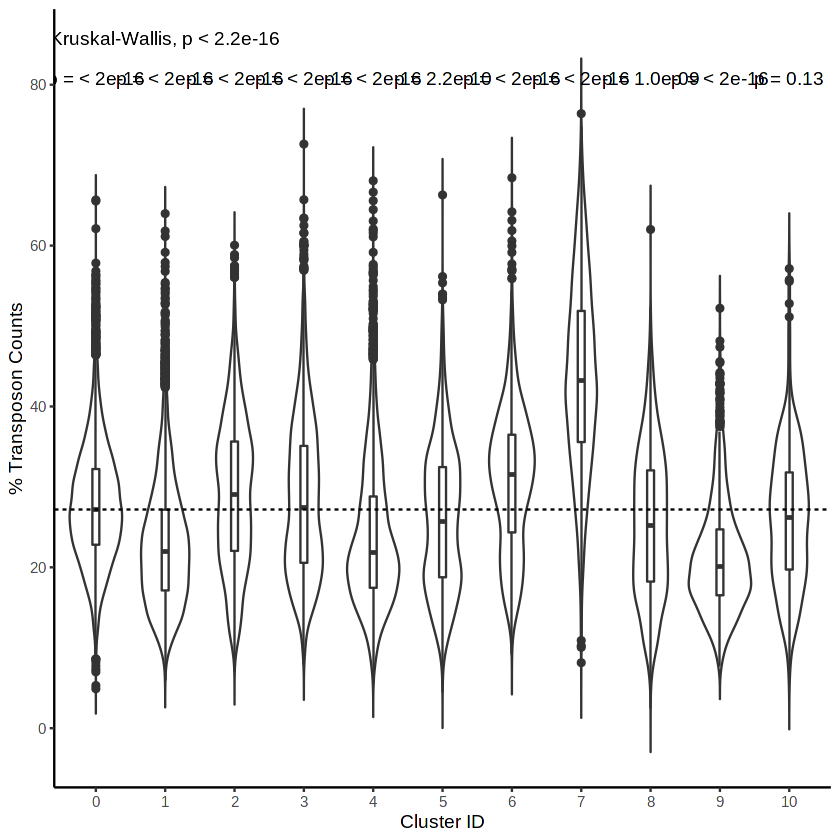

In [48]:
# Basic violin plot
p <- ggplot(df, aes(x=integrated_snn_res.0.3, y=teRatio)) + 
  geom_violin(trim=FALSE) + geom_boxplot(width=0.1) + 
  xlab("Cluster ID") + ylab("% Transposon Counts") + theme_classic() +
  geom_hline(yintercept = mean(df$teRatio), linetype = 2) + 
  stat_compare_means(method = "kruskal.test", label.y = 85)+
  stat_compare_means(label = "p.format", method = "wilcox.test", ref.group = ".all.", hide.ns = TRUE, label.y = 80)  
p

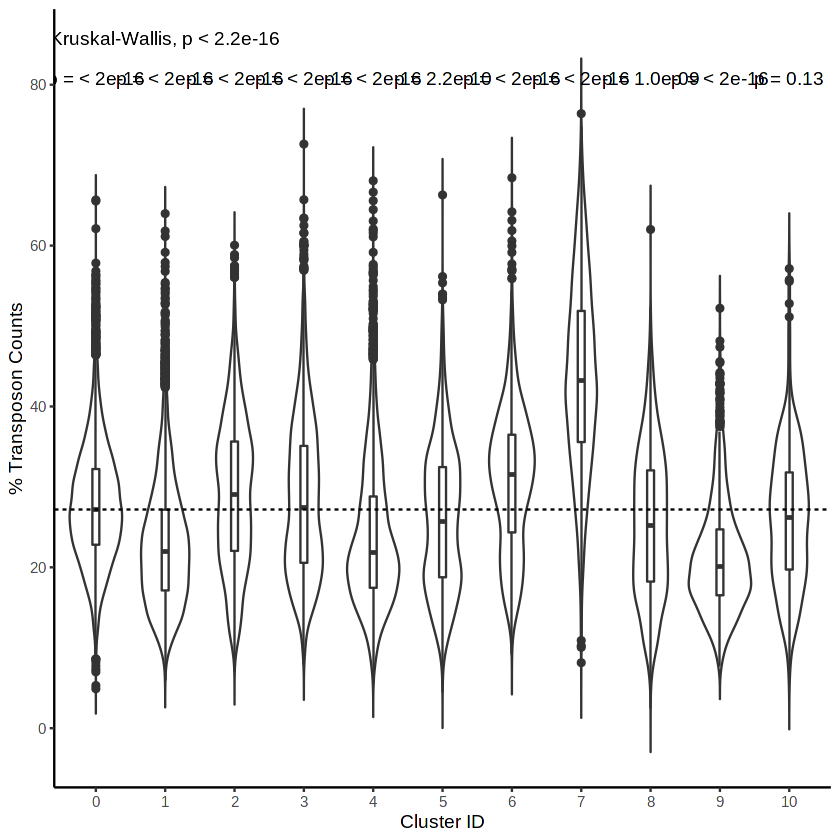

In [42]:
# Basic violin plot (ensuring adjusted p-values are available)
p <- ggplot(df, aes(x=integrated_snn_res.0.3, y=teRatio)) + 
  geom_violin(trim=FALSE) + geom_boxplot(width=0.1) + 
  xlab("Cluster ID") + ylab("% Transposon Counts") + theme_classic() +
  geom_hline(yintercept = mean(df$teRatio), linetype = 2) + 
  stat_compare_means(method = "kruskal.test", label.y = 85)+
  stat_compare_means(label = "p.format", method = "wilcox.test", ref.group = ".all.", method.args=list(p.adjust.method = "BH"),
                     hide.ns = TRUE, label.y = 80)  
p

png 
  2

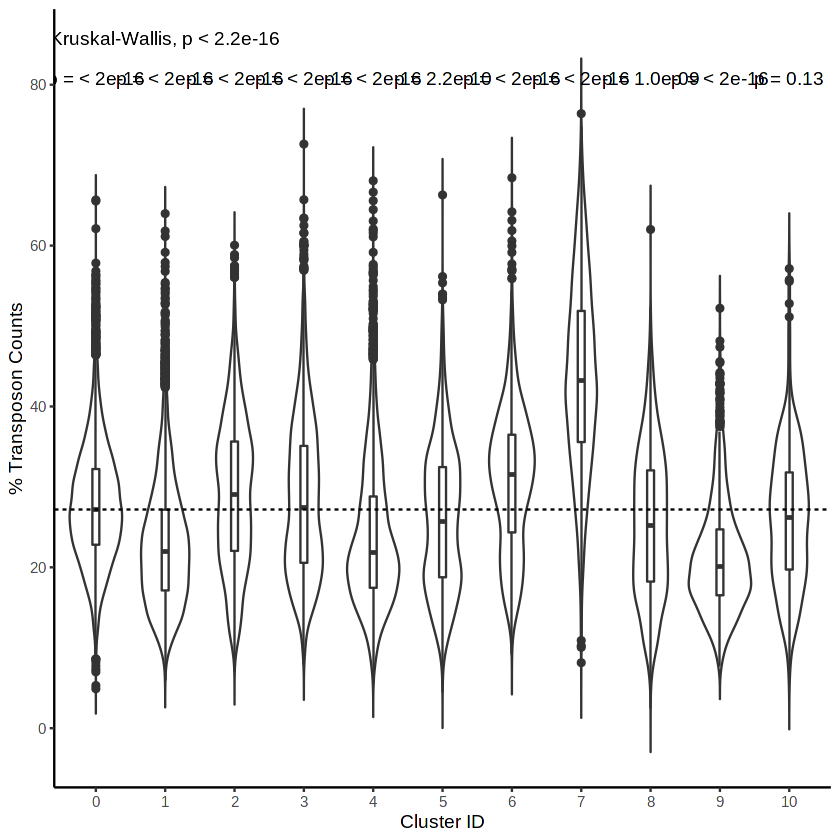

In [43]:
size = 7

p
ggsave("r_gbmsc_PC20r03_teRatioViolin_pval.tiff", units="in", width=size*2, height=size, dpi=300, compression = 'lzw')

pdf("r_gbmsc_PC20r03_teRatioBarViolin_pval.pdf", width = size*2, height = size)
p
dev.off()

## GSEA: Senescence of Cluster 7
2022-01-27: DN of ZFP36L1 in this cluster could be a sign of senescence?

In [ ]:
## Expression (.gct) and phenotype files (.csl) obtained from GSEA run on 2021-08-30 
## See README.md in data/2022-01-27_gsea

In [45]:
setwd("/scratch/samkyy/gete-gbm/results/GBM_NSC_GSEA2022jan27/senescence/")

In [17]:
sen <- read.table(file = "~/scratch/gete-gbm/results/GBM_NSC_GSEA2022jan27/senescence/gseaResults.tsv", 
                 header = TRUE, sep = "\t")
sen <- sen[,1:(length(sen)-2)]
head(sen)

,map,cluster,NAME,SIZE,ES,NES,NOM.p.val,FDR.q.val,FWER.p.val,RANK.AT.MAX
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,GTE,cluster0,GOBP_MULTICELLULAR_ORGANISM_AGING,41,0.3251521,0.8653908,0.682622250,1.000000000,1.000,2266
2,GTE,cluster0,FRIDMAN_SENESCENCE_DN,12,0.3651021,0.8124609,0.722636800,1.000000000,1.000,649
3,GTE,cluster0,FRIDMAN_SENESCENCE_UP,77,0.2613770,0.7325419,0.889112900,1.000000000,1.000,5315
4,GTE,cluster0,FRIDMAN_IMMORTALIZATION_DN,33,0.2378182,0.6118740,0.946145700,0.946340740,1.000,5025
5,GTE,cluster10,FRIDMAN_IMMORTALIZATION_DN,33,0.6642560,1.6305196,0.001082251,0.009428572,0.009,7909
6,GTE,cluster10,FRIDMAN_SENESCENCE_UP,77,0.6071276,1.6195724,0.000000000,0.006357144,0.012,8616


In [18]:
sen$cluster <- factor(sen$cluster, levels=paste0("cluster",c(0:10)))
sen$NAME <- factor(sen$NAME, levels=sort(unique(sen$NAME)))

In [19]:
head(sen)

,map,cluster,NAME,SIZE,ES,NES,NOM.p.val,FDR.q.val,FWER.p.val,RANK.AT.MAX
,<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,GTE,cluster0,GOBP_MULTICELLULAR_ORGANISM_AGING,41,0.3251521,0.8653908,0.682622250,1.000000000,1.000,2266
2,GTE,cluster0,FRIDMAN_SENESCENCE_DN,12,0.3651021,0.8124609,0.722636800,1.000000000,1.000,649
3,GTE,cluster0,FRIDMAN_SENESCENCE_UP,77,0.2613770,0.7325419,0.889112900,1.000000000,1.000,5315
4,GTE,cluster0,FRIDMAN_IMMORTALIZATION_DN,33,0.2378182,0.6118740,0.946145700,0.946340740,1.000,5025
5,GTE,cluster10,FRIDMAN_IMMORTALIZATION_DN,33,0.6642560,1.6305196,0.001082251,0.009428572,0.009,7909
6,GTE,cluster10,FRIDMAN_SENESCENCE_UP,77,0.6071276,1.6195724,0.000000000,0.006357144,0.012,8616


In [44]:
# Sort by the FDR (False Discovery Rate) adjusted p-values 
sen <- dplyr::filter(sen, FDR.q.val <= 0.05)
sen <- sen[order(sen$FDR.q.val, sen$ES, decreasing = FALSE),]
sen

,map,cluster,NAME,SIZE,ES,NES,NOM.p.val,FDR.q.val,FWER.p.val,RANK.AT.MAX
,<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,GTE,cluster5,REACTOME_DNA_DAMAGE_TELOMERE_STRESS_INDUCED_SENESCENCE,28,0.6977163,1.807197,0.000000000,0.000000000,0.000,5602
2,GTE,cluster10,FRIDMAN_SENESCENCE_UP,77,0.6071276,1.619572,0.000000000,0.006357144,0.012,8616
1,GTE,cluster10,FRIDMAN_IMMORTALIZATION_DN,33,0.6642560,1.630520,0.001082251,0.009428572,0.009,7909
5,GTE,cluster5,REACTOME_CELLULAR_SENESCENCE,129,0.5140206,1.531945,0.000000000,0.016636906,0.071,7025
7,GTE,cluster5,GOBP_MULTICELLULAR_ORGANISM_AGING,41,0.5348947,1.472004,0.024134312,0.019321432,0.134,6713
6,GTE,cluster5,REACTOME_OXIDATIVE_STRESS_INDUCED_SENESCENCE,64,0.5156823,1.485547,0.004044489,0.020148820,0.116,6877
4,GTE,cluster5,REACTOME_ONCOGENE_INDUCED_SENESCENCE,33,0.5750439,1.539705,0.009846827,0.023348218,0.066,6877


In [46]:
write.csv(sen, file="gbmsc_gte_GSEAsenescence.csv")

## GSEA: Cell types
2022-01-27:

In [ ]:
## Expression (.gct) and phenotype files (.csl) obtained from GSEA run on 2021-08-30 
## See README.md in data/2022-01-27_gsea

In [42]:
setwd("/scratch/samkyy/gete-gbm/results/GBM_NSC_GSEA2022jan27/pfcCells/")

In [39]:
pfc <- read.table(file = "~/scratch/gete-gbm/results/GBM_NSC_GSEA2022jan27/pfcCells/gseaResults.tsv", 
                 header = TRUE, sep = "\t")
pfc <- pfc[,1:(length(pfc)-2)]
head(pfc)

,map,cluster,NAME,SIZE,ES,NES,NOM.p.val,FDR.q.val,FWER.p.val,RANK.AT.MAX
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,GTE,cluster0,ZHONG_PFC_MAJOR_TYPES_ASTROCYTES,323,0.6853660,1.9870025,0.0000000,0.0000000,0.000,5865
2,GTE,cluster0,ZHONG_PFC_MAJOR_TYPES_OPC,91,0.3944812,1.1148635,0.2698892,0.3478496,0.779,7866
3,GTE,cluster0,ZHONG_PFC_MAJOR_TYPES_EXCITATORY_NEURON,8,0.3404641,0.6931661,0.8361508,0.9372485,1.000,6785
4,GTE,cluster10,ZHONG_PFC_MAJOR_TYPES_MICROGLIA,430,0.4234343,1.1594782,0.0340000,0.3377992,0.663,8542
5,GTE,cluster10,ZHONG_PFC_MAJOR_TYPES_ASTROCYTES,323,0.2708048,0.7378463,0.9940000,0.9160647,1.000,7593
6,GTE,cluster1,ZHONG_PFC_MAJOR_TYPES_ASTROCYTES,323,0.3278070,1.1098460,0.1790000,0.2607828,0.809,9240


In [40]:
pfc$cluster <- factor(pfc$cluster, levels=paste0("cluster",c(0:10)))
pfc$NAME <- factor(pfc$NAME, levels=sort(unique(pfc$NAME)))

In [41]:
# Sort by the FDR (False Discovery Rate) adjusted p-values 
pfc <- dplyr::filter(pfc, FDR.q.val <= 0.06)
pfc <- pfc[order(pfc$FDR.q.val, pfc$ES, decreasing = FALSE),]
pfc

,map,cluster,NAME,SIZE,ES,NES,NOM.p.val,FDR.q.val,FWER.p.val,RANK.AT.MAX
,<chr>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,GTE,cluster0,ZHONG_PFC_MAJOR_TYPES_ASTROCYTES,323,0.6853660,1.987003,0.000000000,0.00000000,0.000,5865
2,GTE,cluster2,ZHONG_PFC_MAJOR_TYPES_OPC,91,0.7172407,2.139076,0.000000000,0.00000000,0.000,4789
5,GTE,cluster5,ZHONG_PFC_MAJOR_TYPES_NPCS,137,0.7260499,2.162889,0.000000000,0.00000000,0.000,7216
9,GTE,cluster8,ZHONG_PFC_MAJOR_TYPES_NPCS,137,0.7775584,2.170560,0.000000000,0.00000000,0.000,3625
4,GTE,cluster4,ZHONG_PFC_MAJOR_TYPES_MICROGLIA,430,0.8673651,3.706886,0.000000000,0.00000000,0.000,3432
7,GTE,cluster6,ZHONG_PFC_MAJOR_TYPES_OPC,91,0.5207042,1.522552,0.006160164,0.01532500,0.056,4838
6,GTE,cluster6,ZHONG_PFC_MAJOR_TYPES_INTERNEURON,18,0.6548158,1.572376,0.020330368,0.01715000,0.031,3190
8,GTE,cluster6,ZHONG_PFC_MAJOR_TYPES_EXCITATORY_NEURON,8,0.6703942,1.386227,0.131462340,0.04033336,0.208,3487
3,GTE,cluster2,ZHONG_PFC_MAJOR_TYPES_ASTROCYTES,323,0.4527549,1.396778,0.000000000,0.04659999,0.127,10170


In [43]:
write.csv(pfc, file="gbmsc_gte_GSEApfcCells.csv")

## Trajectory Analysis
2022-01-30: Adjust path colour to something lighter so it's easier to see.

In [3]:
# don't load the libraries in the first section until this is run first, because the libraries will conflict. 
source("~/scratch/gete-gbm/bin/util_monocle3.R") 

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The following objects are masked from 'package:Biobase':

    anyMissing, rowMedians


The following object is masked from 'package:dplyr':

    count


The following objects are masked from 'package:genefilter':

    rowSds, rowVars



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeighted

In [4]:
##Call the commands below with the following structure whenever I want to auto-select a funtion from a specific package:
library(conflicted)
conflict_prefer("select", "dplyr") ## required in %>% dplyr
# conflict_prefer("rowRanges", "matrixStats")
conflict_prefer("rowRanges", "MatrixGenerics") ## required in new_cell_data_set()

[conflicted] Will prefer dplyr::select over any other package

[conflicted] Will prefer MatrixGenerics::rowRanges over any other package



In [5]:
mkdirToday()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2022-01-30"


In [6]:
## load seurat objects (also another copy in GBMSC_GSEA-aug31)
gbmsc.gte <- readRDS("~/scratch/gete-gbm/results/2021-09-02/gte_gbmscIntUmap-subtypes.rds") 

In [21]:
head(gbmsc.gte@meta.data)
DefaultAssay(gbmsc.gte)

,orig.ident,nUMI,nGene,log10GenesPerUMI,mitoRatio,cells,sample,nCount_RNA,nFeature_RNA,GBM_integrated_snn_res.0.8,⋯,seurat_clusters,MGMTme,sampleCombined,integrated_snn_res.0.2,integrated_snn_res.0.3,integrated_snn_res.0.4,integrated_snn_res.0.5,integrated_snn_res.0.6,teRatio,gbm_subtype
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<int>,<chr>,⋯,<fct>,<lgl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>
GBM_AAACCTGCAATTCCTT-1,1,16712,4840,0.8725599,0.005923887,AAACCTGCAATTCCTT-1,SF11232_1,16712,4840,3,⋯,0,TRUE,SF11232,1,1,1,1,0,28.69794,Classical-Mesenchymal
GBM_AAACCTGCACAGAGGT-1,1,5963,1850,0.8653694,0.046620828,AAACCTGCACAGAGGT-1,SF11232_1,5963,1850,4,⋯,5,TRUE,SF11232,4,4,5,5,5,31.89670,Mesenchymal
GBM_AAACCTGGTGTGGCTC-1,1,7866,2355,0.8655554,0.038901602,AAACCTGGTGTGGCTC-1,SF11232_1,7866,2355,0,⋯,1,TRUE,SF11232,2,0,0,0,1,45.13094,Classical
GBM_AAACGGGGTCCGAATT-1,1,14361,3262,0.8451595,0.042615417,AAACGGGGTCCGAATT-1,SF11232_1,14361,3262,0,⋯,1,TRUE,SF11232,2,0,0,0,1,49.49516,Classical
GBM_AAACGGGTCGAATGGG-1,1,2803,1201,0.8932366,0.040313949,AAACGGGTCGAATGGG-1,SF11232_1,2803,1201,0,⋯,2,TRUE,SF11232,0,2,3,2,2,39.06529,Classical-Proneural
GBM_AAAGATGGTCTCAACA-1,1,6865,2756,0.8966905,0.013255645,AAAGATGGTCTCAACA-1,SF11232_1,6865,2756,8,⋯,3,TRUE,SF11232,0,2,2,2,3,24.85069,Classical-Proneural


[1] "RNA"

In [10]:
Idents(gbmsc.gte) <- gbmsc.gte$`integrated_snn_res.0.3`

In [27]:
DefaultAssay(gbmsc.gte) <- "integrated"


cds <- as.cell_data_set(gbmsc.gte, group.by = gbmsc.gte$integrated_snn_res.0.3)

## Group cells into clusters
cds <- cluster_cells(cds)

Warning message:
"Monocle 3 trajectories require cluster partitions, which Seurat does not calculate. Please run 'cluster_cells' on your cell_data_set object"


In [30]:
p1 <- plot_cells(cds, show_trajectory_graph = FALSE, group_label_size = 4)
p2 <- plot_cells(cds, color_cells_by = "partition", show_trajectory_graph = FALSE, group_label_size = 4)

In [5]:
mkdirToday()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2022-01-30"


In [31]:
size = 7
pdf("r_gbmsc_PC20r03_monocleUMAPs.pdf", width = size*2, height = size)
grid.arrange(p1, p2, nrow = 1, top="Trajectory Analysis: Monocle Clusters vs Partitions")
dev.off()

png 
  2

In [18]:
## Extract sparse matrix, metadata and gene labels to create monocle object
data <- as(as.matrix(GetAssayData(gbmsc.gte, assay = "integrated", slot = "scale.data")), 'sparseMatrix')
meta <- data.frame(gbmsc.gte@meta.data) %>% 
            select(orig.ident, nCount_RNA, nFeature_RNA, sampleCombined, seurat_clusters)
genes <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))

In [19]:
monocle <- new_cell_data_set(expression_data = data, cell_metadata = meta, gene_metadata = genes) 

Warning message in log(cell_total):
"NaNs produced"


In [20]:
# normalize
monocle <- preprocess_cds(monocle, num_dim = 100, norm_method = "size_only", pseudo_count = 0)  
#skip batch effect removal since that is already complete with Seurat

In [ ]:
# reduce dimensions 
monocle <- reduce_dimension(monocle) 

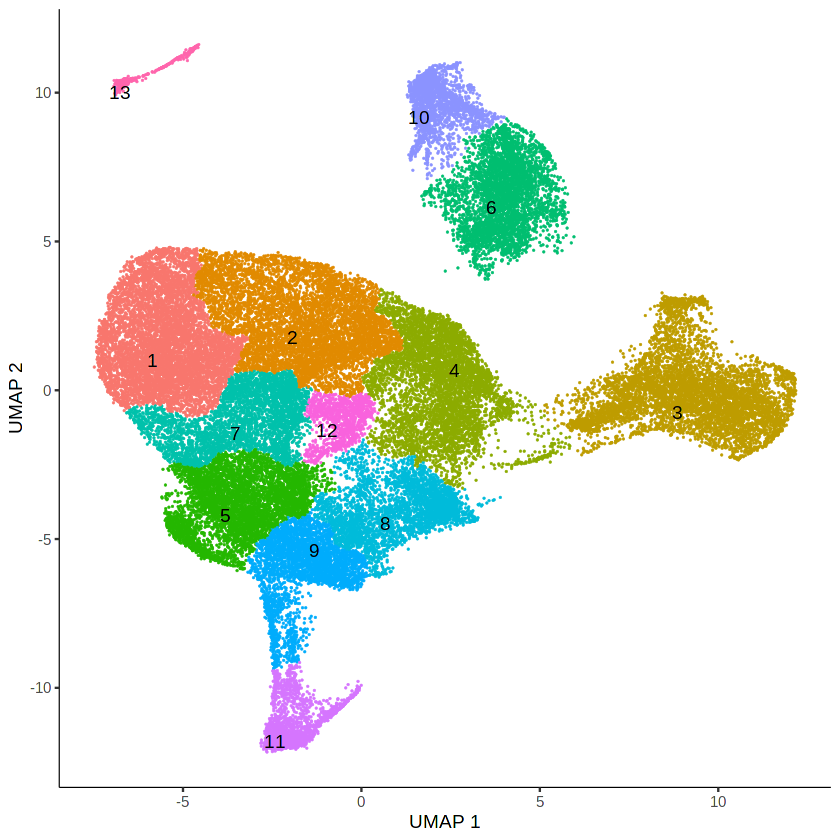

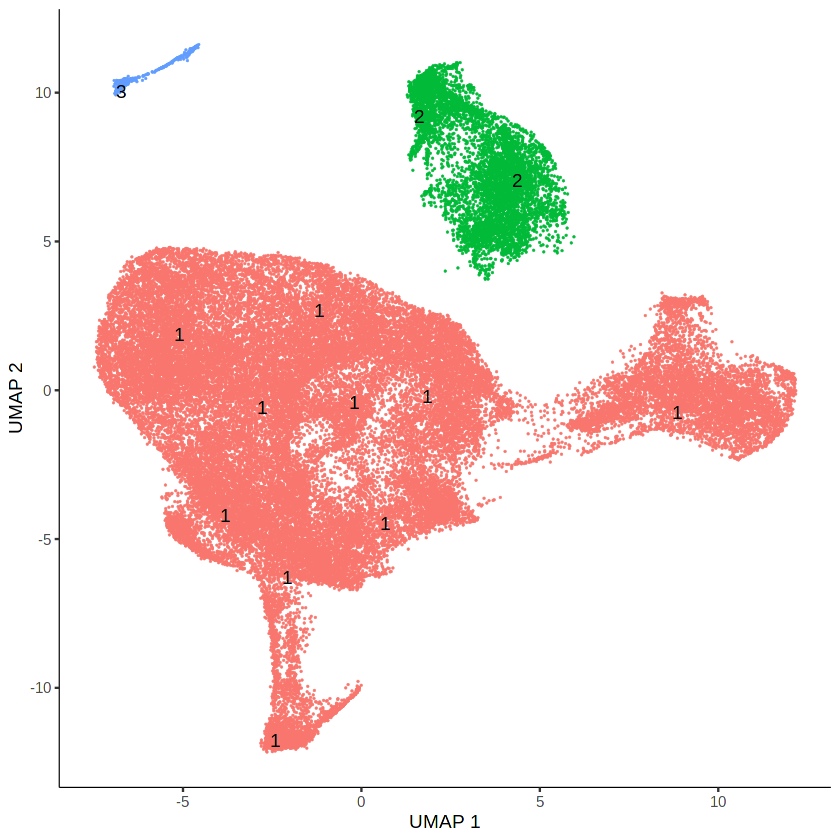

In [32]:
p1
ggsave("r_gbmsc_PC20r03_monocleUMAPs_clusters.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')
p2
ggsave("r_gbmsc_PC20r03_monocleUMAPs_partitions.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

In [33]:
# Select Island to study the trajectory on:
par1 <- subset(as.Seurat(cds), monocle3_partitions == 1)

In [34]:
# Convert back to monocle object and learn the graph
par1 <- as.cell_data_set(par1)
par1 <- learn_graph(par1)

Using existing Monocle 3 cluster membership and partitions



  |======================================================================| 100%


In [40]:
saveRDS(par1, file="gbmsc_pseudo_clus6.rds")

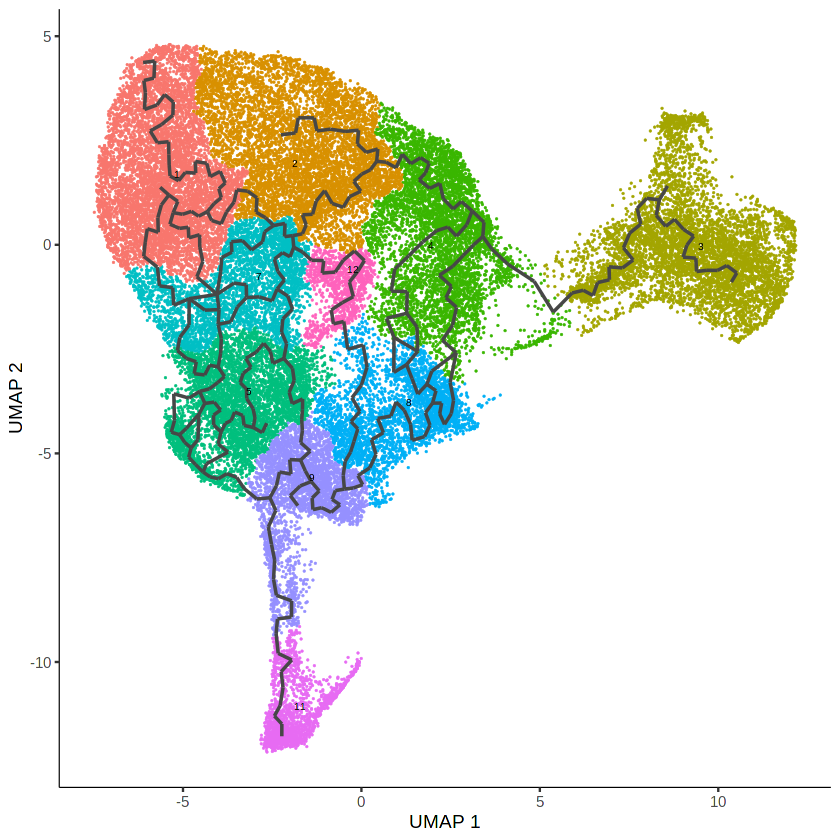

In [36]:
p1 <- plot_cells(par1, label_groups_by_cluster = FALSE, label_leaves = FALSE, label_branch_points = FALSE)
p1
ggsave("r_gbmsc_PC20r03_monocleUMAPs_path.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

In [39]:
## Select root cells == GTE_PC20_r0.3: Cluster 6 (or cluster 11 from monocle cluster_cells function)
par1_obj <- subset(as.Seurat(cds), monocle3_partitions == 1)
root_cells1 <- rownames(gbmsc.gte@meta.data[which(FetchData(par1_obj, "integrated_snn_res.0.3") == 6),])

## Order Cells
par1_rooted <- order_cells(par1, root_cells = root_cells1)

ERROR: Error: All provided root_cells must be present in the cell data set.


In [ ]:
p1 <- plot_cells(par1_rooted, color_cells_by = "pseudotime", 
           label_cell_groups = FALSE, label_leaves = FALSE, label_branch_points = FALSE)

p1

##  End of notebook

In [47]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /cvmfs/soft.computecanada.ca/easybuild/software/2020/Core/imkl/2020.1.217/compilers_and_libraries_2020.1.217/linux/mkl/lib/intel64_lin/libmkl_gf_lp64.so

locale:
 [1] LC_CTYPE=en_CA.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_CA.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_CA.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ggforce_0.3.3           RColorBrewer_1.1-2      GO.db_3.12.1           
 [4] org.Hs.eg.db_3.12.0     GOstats_2.56.0          graph_1.68.0           
 [7] Category_2.56.0     